<a href="https://www.kaggle.com/code/ujunwajoyclyn/credit-card-churn?scriptVersionId=124788121" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

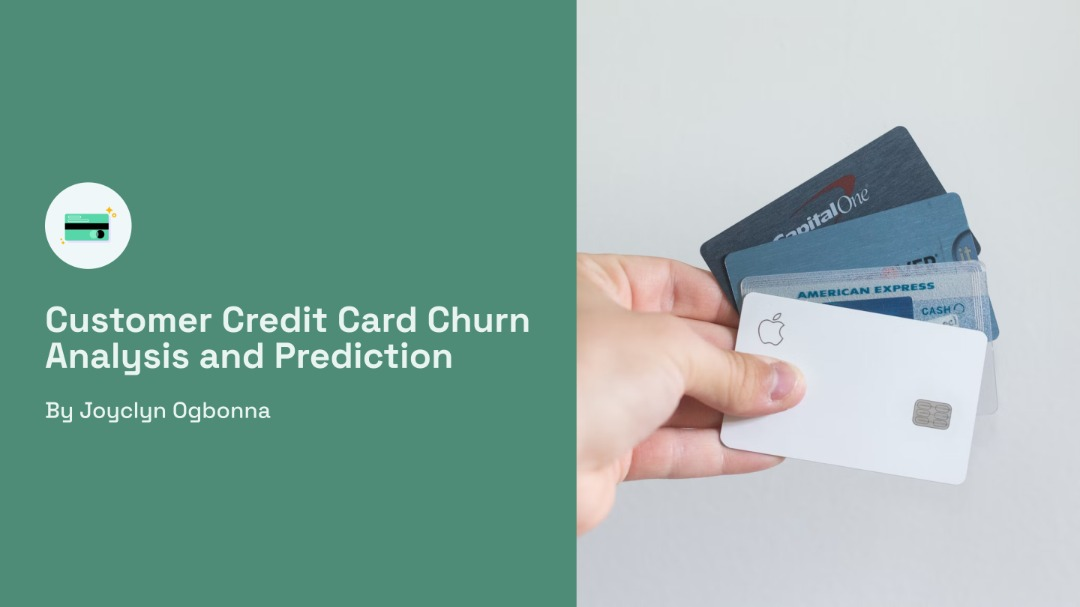

# Objectives

The objectives of this project is to:
* Perform exploratory data analysis on the data
* Inspect and analyse each variable and target to uncover the reason behind customer churn
* Predict customers that are likely to churn

# Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import altair as alt
from matplotlib.colors import ListedColormap
from matplotlib.pyplot import figure
from scipy.stats import shapiro 
from scipy.stats import anderson
from scipy.stats import normaltest
import scipy.stats as stats
from scipy.stats import chi2
import scipy.stats
from numpy import sqrt
from scipy.stats import norm

# **Getting Familiar with Data**

# Colour Selection

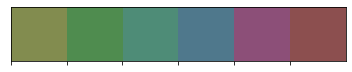

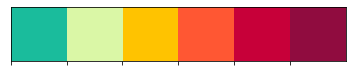

In [2]:
colour_1 = ['#828C4F','#4F8C4F','#4E8C77','#4F788C','#8C4F78','#8C4F4F']
colour_2=['#1abc9c','#DAF7A6','#FFC300','#FF5733','#C70039','#900C3F']

sns.palplot(sns.color_palette(colour_1))
sns.palplot(sns.color_palette(colour_2))


# Data Loading

In [3]:
data = pd.read_csv('/kaggle/input/credit-card-bank-churn/credit_card_churn.csv')
data.head(3)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   

[3 rows x 23 columns]

# Data Shape

In [4]:
data.shape

(10127, 23)

The Credit Card Churn dataset has 10,127 observations and 23 columns. It has no missing value or data type inaccuracies.

# Data Cleaning

In [5]:
# remove the last two columns because they are the results of the naive bayes classification done by the dataset publisher
data.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                   'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], inplace=True)

# Data Types and Missing Data

In [6]:
# check the data types of columns and missing values in the dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

**Insights:**
Data has no missing data and all data types are accurate

# Duplicates

In [7]:
# check for duplicate values in the data
data.duplicated().sum()

0

**Insights:**
Data has no duplicate values

# Unique Values for Numerical Columns

In [8]:
data.select_dtypes(exclude="object").nunique()

CLIENTNUM                   10127
Customer_Age                   45
Dependent_count                 6
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

# Unique Values for Categorical Columns

In [9]:
data.select_dtypes(include="object").nunique()

Attrition_Flag     2
Gender             2
Education_Level    7
Marital_Status     4
Income_Category    6
Card_Category      4
dtype: int64

# Feature Dictionary
* **No NA**
* **Clientum**: represents the unique IDs of customers. It is formed by a unique sequence of 9 digits. There is a total of 10,127 unique customers in the datasets.
* **Attrition_Flag**: this target/output variable represents the current status of customers. It has two unique values: one is Existing Customer (current customer) and Attrited Customer (churned customer).
* **Customer_Age**: this variable consist of the age of customers. The age range of customers is between 27 and 73.
* **Gender**: this variable is coded as F for Female and M for Male.
* **Dependent_count**: this variable represents the number of dependents associated with a customer.
* **Education_Level**: this variable represents the educational qualification of a customer. It consist of 7 unique values which are High School, Graduate, Uneducated, College, Post-graduate, Doctorate and Unknown. The Unknown group has 1519 customers.
* **Marital_Status**: this variable represents the marital status of customers. It has 4 unique values which are Married, Single, Unknown, Divorced. The Unknown group has 749 customers.
* **Income_Category**: this variable represents the annual income category of card holder: Less than $40K,  $40k-$60K,  $60K-$80K,  $80K-120K,  $120+, Unknown. The Unknown group has 1112 customer in this category.
* **Card_Category**: this is a product variable that represents the credit card type. It has 4 unique values - Blue, Gold, Silver and Platinum.
* **Months_on_book**: represents the number of months (period) the account holder has been a customer in the bank.
* **Total_Relationship_Count**: represents the number of products held by the customer.
* **Months_Inactive_12_mon**: this is the number of months a customer has been inactive in the last 12 months (1 year).
* **Contacts_Count_12_mon**: this is the number of times a customer has made contact with the bank.
* **Credit_Limit**: this is the credit limit on the credit card owned by customer.
* **Total_Revolving_Bal**: represents total revolving balance on the credit card.
* **Avg_Open_To_Buy**: represents the average Open to Buy Credit Line for last 12 months.
* **Total_Amt_Chng_Q4_Q1**: represents the change in transaction amount from Q4 over Q1.
* **Total_Trans_Amt**: represents the total transaction amount in the last 12 months.
* **Total_Trans_Ct**: represents the total transaction count in the last 12 months.
* **Total_Ct_Chng_Q4_Q1**: represents the change in transaction count from Q4 over Q1.
* **Avg_Utilization_Ratio**: represents the average card utilization ratio.


# Feature Definition
* [Credit Limit](https://www.investopedia.com/terms/c/credit_limit.asp)
* [Revolving Balance](https://www.chase.com/personal/credit-cards/education/build-credit/revolving-credit)
* [Open-To-Buy credit card](https://merchantservicesnewjersey.com/definitions/open-to-buy/)
* [Credit Line](https://www.thebalancemoney.com/what-is-a-credit-line-315586)

# Statistical Summary of Numerical Columns 

In [10]:
# check the statistical summary of the numerical columns in the data
data.describe().T

count          mean           std          min  \
CLIENTNUM                 10127.0  7.391776e+08  3.690378e+07  708082083.0   
Customer_Age              10127.0  4.632596e+01  8.016814e+00         26.0   
Dependent_count           10127.0  2.346203e+00  1.298908e+00          0.0   
Months_on_book            10127.0  3.592841e+01  7.986416e+00         13.0   
Total_Relationship_Count  10127.0  3.812580e+00  1.554408e+00          1.0   
Months_Inactive_12_mon    10127.0  2.341167e+00  1.010622e+00          0.0   
Contacts_Count_12_mon     10127.0  2.455317e+00  1.106225e+00          0.0   
Credit_Limit              10127.0  8.631954e+03  9.088777e+03       1438.3   
Total_Revolving_Bal       10127.0  1.162814e+03  8.149873e+02          0.0   
Avg_Open_To_Buy           10127.0  7.469140e+03  9.090685e+03          3.0   
Total_Amt_Chng_Q4_Q1      10127.0  7.599407e-01  2.192068e-01          0.0   
Total_Trans_Amt           10127.0  4.404086e+03  3.397129e+03        510.0   
Total_Trans_Ct            10127.0  6.485869e+01  2.347257e+01         10.0   
Total_Ct_Chng_Q4_Q1       10127.0  7.122224e-01  2.380861e-01          0.0   
Avg_Utilization_Ratio     10127.0  2.748936e-01  2.756915e-01          0.0   

                                   25%           50%           75%  \
CLIENTNUM                 7.130368e+08  7.179264e+08  7.731435e+08   
Customer_Age              4.100000e+01  4.600000e+01  5.200000e+01   
Dependent_count           1.000000e+00  2.000000e+00  3.000000e+00   
Months_on_book            3.100000e+01  3.600000e+01  4.000000e+01   
Total_Relationship_Count  3.000000e+00  4.000000e+00  5.000000e+00   
Months_Inactive_12_mon    2.000000e+00  2.000000e+00  3.000000e+00   
Contacts_Count_12_mon     2.000000e+00  2.000000e+00  3.000000e+00   
Credit_Limit              2.555000e+03  4.549000e+03  1.106750e+04   
Total_Revolving_Bal       3.590000e+02  1.276000e+03  1.784000e+03   
Avg_Open_To_Buy           1.324500e+03  3.474000e+03  9.859000e+03   
Total_Amt_Chng_Q4_Q1      6.310000e-01  7.360000e-01  8.590000e-01   
Total_Trans_Amt           2.155500e+03  3.899000e+03  4.741000e+03   
Total_Trans_Ct            4.500000e+01  6.700000e+01  8.100000e+01   
Total_Ct_Chng_Q4_Q1       5.820000e-01  7.020000e-01  8.180000e-01   
Avg_Utilization_Ratio     2.300000e-02  1.760000e-01  5.030000e-01   

                                   max  
CLIENTNUM                 8.283431e+08  
Customer_Age              7.300000e+01  
Dependent_count           5.000000e+00  
Months_on_book            5.600000e+01  
Total_Relationship_Count  6.000000e+00  
Months_Inactive_12_mon    6.000000e+00  
Contacts_Count_12_mon     6.000000e+00  
Credit_Limit              3.451600e+04  
Total_Revolving_Bal       2.517000e+03  
Avg_Open_To_Buy           3.451600e+04  
Total_Amt_Chng_Q4_Q1      3.397000e+00  
Total_Trans_Amt           1.848400e+04  
Total_Trans_Ct            1.390000e+02  
Total_Ct_Chng_Q4_Q1       3.714000e+00  
Avg_Utilization_Ratio     9.990000e-01

**Insights from table above:**
* The mean of customer age is 46.33 and the median is 46. This means that most customers are 46 years old
* The dependent count column has a mean of approximately 2 and median 2, customers have mostly 2 dependents
* The mean of the months on book is approximately 36 and the median is 36, meaning that most customers have been with the bank for 36 months
* Total relationship count has ~4 as mean and 4 as median
* There's a change in credit limit column. It has a mean of ~8,632 and median of 4,549. This implies that data has outliers and might tend to be left skewed (check if assumption still stands in EDA) especially because the minimum amount of credit limit is 1,438.3 while its maximum is 34,516.
* Total revolving balance has mean of ~1,163 and median of 1,276; this means that it is not uniformly distributed but there isn't any outliers.
* Total transaction amount has a mean of ~4,404 and median of 3,899.

# **Pre-EDA Data Processing**

In [11]:
# delete the customer id column
data.drop(columns='CLIENTNUM', inplace=True)

In [12]:
# remove space in column names and make the letters lowercase
data.columns = [i.replace(" ", "_").lower() for i in data.columns]

In [13]:
# check columns to be used for EDA
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   attrition_flag            10127 non-null  object 
 1   customer_age              10127 non-null  int64  
 2   gender                    10127 non-null  object 
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   income_category           10127 non-null  object 
 7   card_category             10127 non-null  object 
 8   months_on_book            10127 non-null  int64  
 9   total_relationship_count  10127 non-null  int64  
 10  months_inactive_12_mon    10127 non-null  int64  
 11  contacts_count_12_mon     10127 non-null  int64  
 12  credit_limit              10127 non-null  float64
 13  total_revolving_bal       10127 non-null  int64  
 14  avg_op

# **Exploratory Data Analysis**

# 4.1 Numerical Data

**Age**

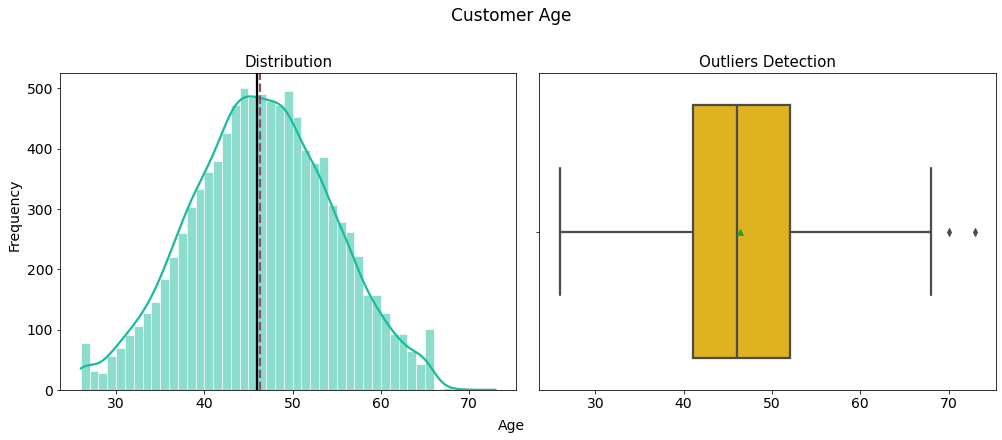

In [14]:
fig, axes = plt.subplots(1,2,figsize=(14, 6))
plt.subplots_adjust(wspace=0.5)
fig.suptitle("Customer Age", fontsize=17)
fig.text(0.5, 0.0016, 'Age', ha='center', fontsize=14)
fig.text(0.00001, 0.5, 'Frequency', va='center', rotation='vertical', fontsize=14)
sns.set_style("darkgrid",{"axes.facecolour":".9"})
sns.set_context('talk')

ax1=sns.histplot(data, x='customer_age', kde=True, color= '#1abc9c', ax=axes[0])
ax1.axvline(np.mean(data['customer_age']), color='#8C4F78',linestyle='--')
ax1.axvline(np.median(data['customer_age']), color='#000000',linestyle='-')
ax1.tick_params(labelsize=14)
ax1.set(xlabel=None)
ax1.set(ylabel=None)
ax2=sns.boxplot(x=data['customer_age'], color='#FFC300',showmeans=True, ax=axes[1])
ax2.set(xlabel=None)
ax2.set(ylabel=None)
ax2.tick_params(labelsize=14)

fontsize=15
ax1.set_title("Distribution",fontdict={'fontsize': fontsize})
ax2.set_title("Outliers Detection",fontdict={'fontsize': fontsize})

fig.tight_layout()
fig.show()

The customers age has a fairly normal distribution and classified customers older than 70 as unusal age in the dataset. However, in most countries some senior citizen have and use credit cards. Therefore for this project/analysis, these unusal observations are not seen as outliers.                                                                                                                    

**Analysis of behaviour of customers that are 70 years and above**

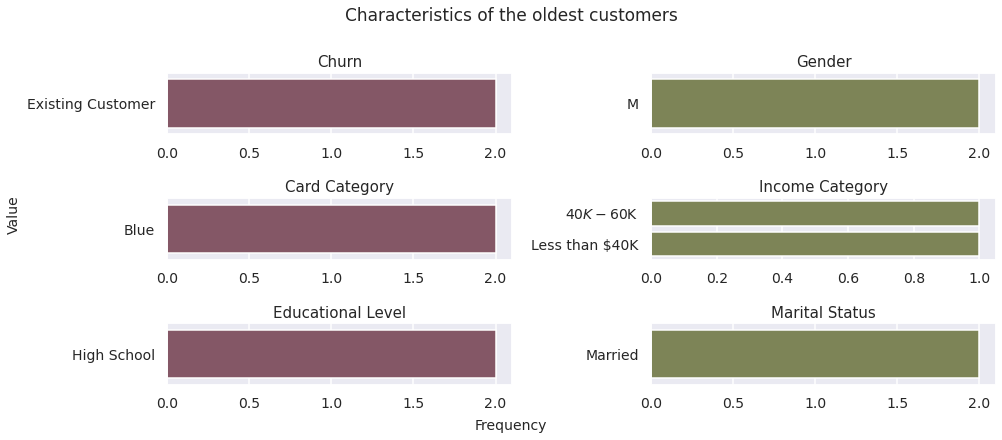

In [15]:
fig, axes = plt.subplots(3, 2, figsize=(14, 6))
plt.subplots_adjust(hspace=0.6, wspace=0.5)
fig.suptitle("Characteristics of the oldest customers", fontsize=17)
fig.text(0.5, 0.0016, 'Frequency', ha='center', fontsize=14)
fig.text(0.00001, 0.5, 'Value', va='center', rotation='vertical', fontsize=14)
sns.set_context('talk')

ax1=sns.countplot(y=data[data.customer_age >= 70]['attrition_flag'], color= '#8C4F63',ax=axes[0,0])
ax1.tick_params(labelsize=14)
ax1.set(xlabel=None)
ax1.set(ylabel=None)
ax2=sns.countplot(y=data[data.customer_age >= 70]['gender'], color='#828C4F', ax=axes[0,1])
ax2.tick_params(labelsize=14)
ax2.set(xlabel=None)
ax2.set(ylabel=None)
ax3=sns.countplot(y=data[data.customer_age >= 70]['card_category'], color='#8C4F63',ax=axes[1,0])
ax3.tick_params(labelsize=14)
ax3.set(xlabel=None)
ax3.set(ylabel=None)
ax4=sns.countplot(y=data[data.customer_age >= 70]['income_category'], color='#828C4F', ax=axes[1,1])
ax4.tick_params(labelsize=14)
ax4.set(xlabel=None)
ax4.set(ylabel=None)
ax5=sns.countplot(y=data[data.customer_age >= 70]['education_level'], color='#8C4F63',ax=axes[2,0])
ax5.tick_params(labelsize=14)
ax5.set(xlabel=None)
ax5.set(ylabel=None)
ax6=sns.countplot(y=data[data.customer_age >= 70]['marital_status'], color='#828C4F', ax=axes[2,1])
ax6.tick_params(labelsize=14)
ax6.set(xlabel=None)
ax6.set(ylabel=None)

fontsize=15
ax1.set_title("Churn",fontdict={'fontsize': fontsize})
ax2.set_title("Gender",fontdict={'fontsize': fontsize})
ax3.set_title("Card Category",fontdict={'fontsize': fontsize})
ax4.set_title("Income Category",fontdict={'fontsize': fontsize})
ax5.set_title("Educational Level",fontdict={'fontsize': fontsize})
ax6.set_title("Marital Status",fontdict={'fontsize': fontsize})

fig.tight_layout()
fig.show()

Both are all existing customers, males, hold blue cards, high school degree holders, married and low income earners. 

**Dependent Counts**

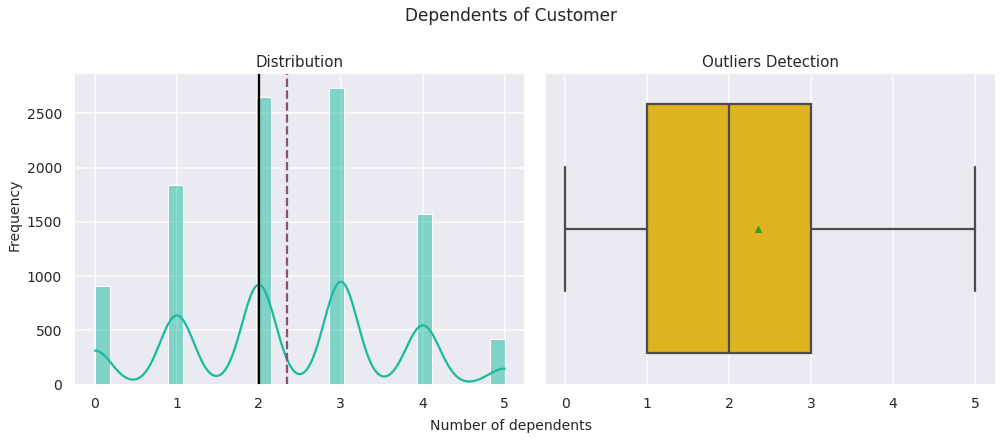

In [16]:
fig, axes = plt.subplots(1,2,figsize=(14, 6))
plt.subplots_adjust(wspace=0.5)
fig.suptitle("Dependents of Customer", fontsize=17)
fig.text(0.5, 0.0016, 'Number of dependents', ha='center', fontsize=14)
fig.text(0.00001, 0.5, 'Frequency', va='center', rotation='vertical', fontsize=14)
sns.set_style("darkgrid",{"axes.facecolour":".9"})
sns.set_context('talk')

ax1=sns.histplot(data, x='dependent_count', kde=True, color= '#1abc9c', ax=axes[0])
ax1.axvline(np.mean(data['dependent_count']), color='#8C4F78',linestyle='--')
ax1.axvline(np.median(data['dependent_count']), color='#000000',linestyle='-')
ax1.tick_params(labelsize=14)
ax1.set(xlabel=None)
ax1.set(ylabel=None)
ax2=sns.boxplot(x=data['dependent_count'], color='#FFC300',showmeans=True, ax=axes[1])
ax2.set(xlabel=None)
ax2.set(ylabel=None)
ax2.tick_params(labelsize=14)

fontsize=15
ax1.set_title("Distribution",fontdict={'fontsize': fontsize})
ax2.set_title("Outliers Detection",fontdict={'fontsize': fontsize})

fig.tight_layout()
fig.show()

Dependent count is positively skewed and has no outlier. 

Most customers has 2-3 dependents

**Months on book**

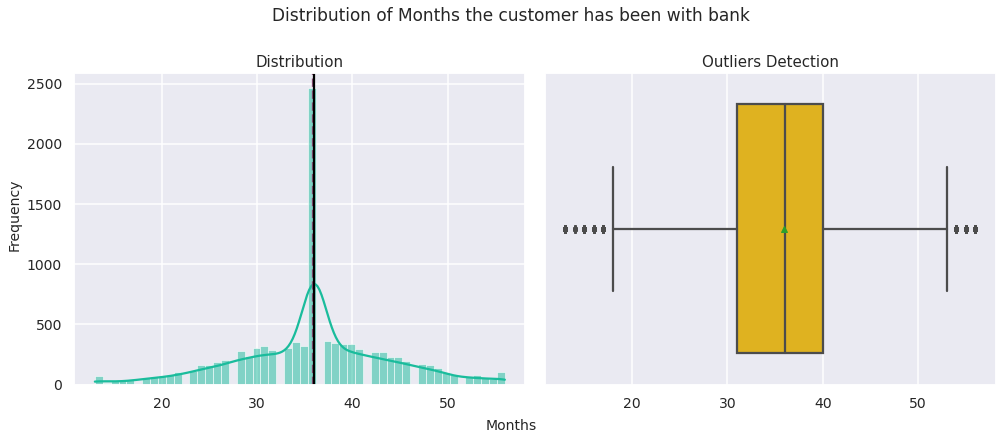

In [17]:
fig, axes = plt.subplots(1,2,figsize=(14, 6))
plt.subplots_adjust(wspace=0.5)
fig.suptitle("Distribution of Months the customer has been with bank", fontsize=17)
fig.text(0.5, 0.0016, 'Months', ha='center', fontsize=14)
fig.text(0.00001, 0.5, 'Frequency', va='center', rotation='vertical', fontsize=14)
sns.set_style("darkgrid",{"axes.facecolour":".9"})
sns.set_context('talk')

ax1=sns.histplot(data, x='months_on_book', kde=True, color= '#1abc9c', ax=axes[0])
ax1.axvline(np.mean(data['months_on_book']), color='#8C4F78',linestyle='--')
ax1.axvline(np.median(data['months_on_book']), color='#000000',linestyle='-')
ax1.tick_params(labelsize=14)
ax1.set(xlabel=None)
ax1.set(ylabel=None)
ax2=sns.boxplot(x=data['months_on_book'], color='#FFC300',showmeans=True, ax=axes[1])
ax2.set(xlabel=None)
ax2.set(ylabel=None)
ax2.tick_params(labelsize=14)

fontsize=15
ax1.set_title("Distribution",fontdict={'fontsize': fontsize})
ax2.set_title("Outliers Detection",fontdict={'fontsize': fontsize})

fig.tight_layout()
fig.show()

The histogram visualisation shows that the months_on_book column is normally distributed but the boxplot shows that customers who have been with  bank from 0-18 months, and 55 months and above are unusual. 

For this analysis, I will not classify these as outliers because a bank can have new customers and really 'old' customers. The box plot could have classified them as outliers because the most frequent data point (36th month), which appears to also be the median and mean have 4 times the number of customers when compared to other data points. This aside, I would further investigate the behaviour of new customers and 'old' one separately, especially in churn.

As mentioned above, the distribution histogram looks the same to the left and right of the center point. This suggests that it is normally distributed, however, judging from how there are 2500 customers are in their 36th month with the bank I have some doubts. To clear my doubt on the normal distribution, I would use Shapiro-Wilks Normality Test confirm the normality of the data.

Note that Shapiro-Wilks Normality Test tests the null hypothesis that months_on_book samples came from a normally distributed population. The If the p value is less than alpha level of 0.05, then I will reject the null hypothesis and there is evidence that the months_on_book data are not normally distributed.

In [18]:
# check normality using Shapiro-Wilks Normality Test
print('Shapiro-Wilks Normality Test: {}'.format(shapiro(data['months_on_book'])))

Shapiro-Wilks Normality Test: ShapiroResult(statistic=0.9769121408462524, pvalue=1.8911096747914394e-37)


**For Shapiro-Wilks:** p-value is less than 0.5: reject hypothesis of normality

This confirms my objection that this data is normally distributed.

**Analysis of customers who have been with bank for 14-18 months and 54&above months**

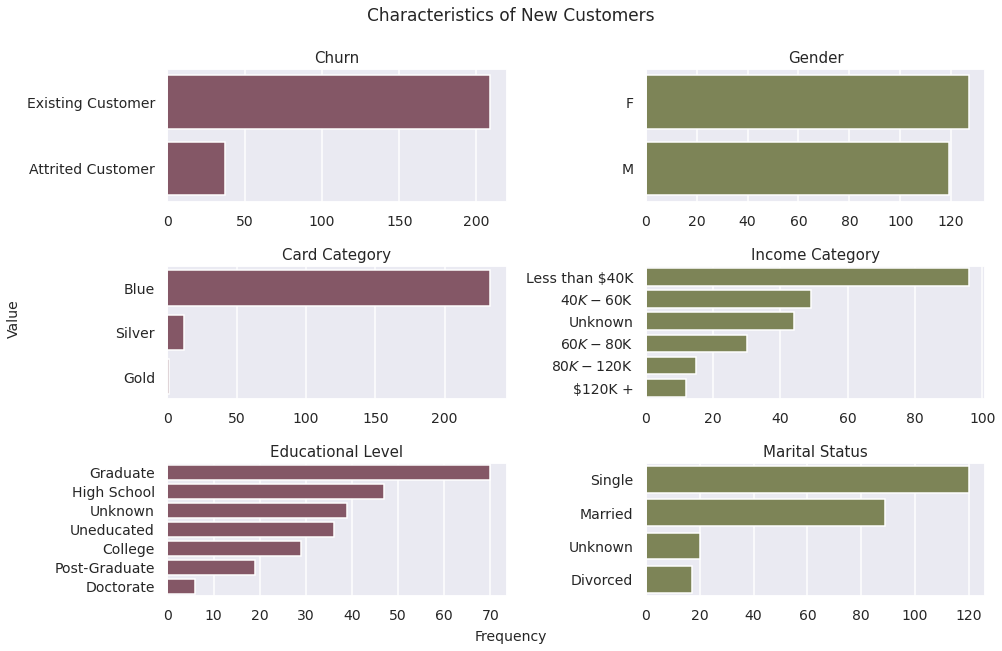

In [19]:
fig, axes = plt.subplots(3, 2, figsize=(14, 9))
plt.subplots_adjust(hspace=0.6, wspace=0.5)
fig.suptitle("Characteristics of New Customers", fontsize=17)
fig.text(0.5, 0.0016, 'Frequency', ha='center', fontsize=14)
fig.text(0.00001, 0.5, 'Value', va='center', rotation='vertical', fontsize=14)
sns.set_context('talk')

ax1=sns.countplot(y=data[(data.months_on_book <= 18)]['attrition_flag'], color= '#8C4F63', order=data[(data.months_on_book <= 18)]['attrition_flag'].value_counts().index,ax=axes[0,0])
ax1.tick_params(labelsize=14)
ax1.set(xlabel=None)
ax1.set(ylabel=None)
ax2=sns.countplot(y=data[(data.months_on_book <= 18)]['gender'], color='#828C4F', order=data[(data.months_on_book <= 18)]['gender'].value_counts().index, ax=axes[0,1])
ax2.tick_params(labelsize=14)
ax2.set(xlabel=None)
ax2.set(ylabel=None)
ax3=sns.countplot(y=data[(data.months_on_book <= 18)]['card_category'], color='#8C4F63',order=data[(data.months_on_book <= 18)]['card_category'].value_counts().index, ax=axes[1,0])
ax3.tick_params(labelsize=14)
ax3.set(xlabel=None)
ax3.set(ylabel=None)
ax4=sns.countplot(y=data[(data.months_on_book <= 18)]['income_category'], color='#828C4F', order=data[(data.months_on_book <= 18)]['income_category'].value_counts().index, ax=axes[1,1])
ax4.tick_params(labelsize=14)
ax4.set(xlabel=None)
ax4.set(ylabel=None)
ax5=sns.countplot(y=data[(data.months_on_book <= 18)]['education_level'], color='#8C4F63',order=data[(data.months_on_book <= 18)]['education_level'].value_counts().index, ax=axes[2,0])
ax5.tick_params(labelsize=14)
ax5.set(xlabel=None)
ax5.set(ylabel=None)
ax6=sns.countplot(y=data[(data.months_on_book <= 18)]['marital_status'], order=data[(data.months_on_book <= 18)]['marital_status'].value_counts().index, color='#828C4F', ax=axes[2,1])
ax6.tick_params(labelsize=14)
ax6.set(xlabel=None)
ax6.set(ylabel=None)

fontsize=15
ax1.set_title("Churn",fontdict={'fontsize': fontsize})
ax2.set_title("Gender",fontdict={'fontsize': fontsize})
ax3.set_title("Card Category",fontdict={'fontsize': fontsize})
ax4.set_title("Income Category",fontdict={'fontsize': fontsize})
ax5.set_title("Educational Level",fontdict={'fontsize': fontsize})
ax6.set_title("Marital Status",fontdict={'fontsize': fontsize})

fig.tight_layout()
fig.show()

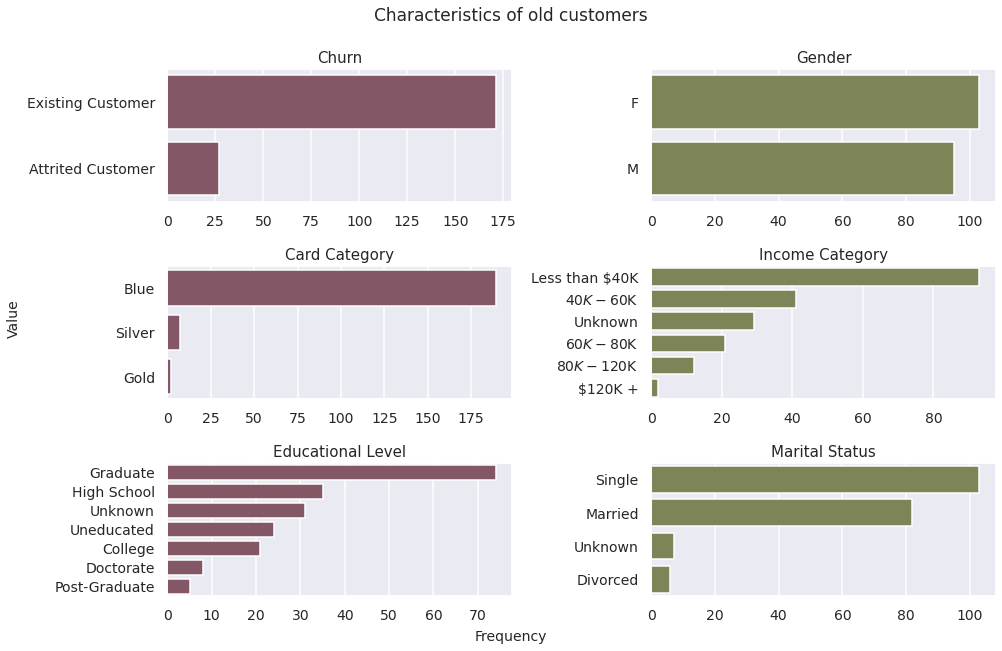

In [20]:
fig, axes = plt.subplots(3, 2, figsize=(14, 9))
plt.subplots_adjust(hspace=0.6, wspace=0.5)
fig.suptitle("Characteristics of old customers", fontsize=17)
fig.text(0.5, 0.0016, 'Frequency', ha='center', fontsize=14)
fig.text(0.00001, 0.5, 'Value', va='center', rotation='vertical', fontsize=14)
sns.set_context('talk')

ax1=sns.countplot(y=data[(data.months_on_book >= 54)]['attrition_flag'], color= '#8C4F63', order=data[(data.months_on_book >= 54)]['attrition_flag'].value_counts().index,ax=axes[0,0])
ax1.tick_params(labelsize=14)
ax1.set(xlabel=None)
ax1.set(ylabel=None)
ax2=sns.countplot(y=data[(data.months_on_book >= 54)]['gender'], color='#828C4F', order=data[(data.months_on_book >= 54)]['gender'].value_counts().index, ax=axes[0,1])
ax2.tick_params(labelsize=14)
ax2.set(xlabel=None)
ax2.set(ylabel=None)
ax3=sns.countplot(y=data[(data.months_on_book >= 54)]['card_category'], color='#8C4F63',order=data[ (data.months_on_book >= 54)]['card_category'].value_counts().index, ax=axes[1,0])
ax3.tick_params(labelsize=14)
ax3.set(xlabel=None)
ax3.set(ylabel=None)
ax4=sns.countplot(y=data[(data.months_on_book >= 54)]['income_category'], color='#828C4F', order=data[(data.months_on_book >= 54)]['income_category'].value_counts().index, ax=axes[1,1])
ax4.tick_params(labelsize=14)
ax4.set(xlabel=None)
ax4.set(ylabel=None)
ax5=sns.countplot(y=data[(data.months_on_book >= 54)]['education_level'], color='#8C4F63',order=data[(data.months_on_book >= 54)]['education_level'].value_counts().index, ax=axes[2,0])
ax5.tick_params(labelsize=14)
ax5.set(xlabel=None)
ax5.set(ylabel=None)
ax6=sns.countplot(y=data[(data.months_on_book >= 54)]['marital_status'], order=data[(data.months_on_book >= 54)]['marital_status'].value_counts().index, color='#828C4F', ax=axes[2,1])
ax6.tick_params(labelsize=14)
ax6.set(xlabel=None)
ax6.set(ylabel=None)

fontsize=15
ax1.set_title("Churn",fontdict={'fontsize': fontsize})
ax2.set_title("Gender",fontdict={'fontsize': fontsize})
ax3.set_title("Card Category",fontdict={'fontsize': fontsize})
ax4.set_title("Income Category",fontdict={'fontsize': fontsize})
ax5.set_title("Educational Level",fontdict={'fontsize': fontsize})
ax6.set_title("Marital Status",fontdict={'fontsize': fontsize})

fig.tight_layout()
fig.show()

Both new and old customers are very similar and only a few of them have churned from the bank.

**Total Relationship Count**

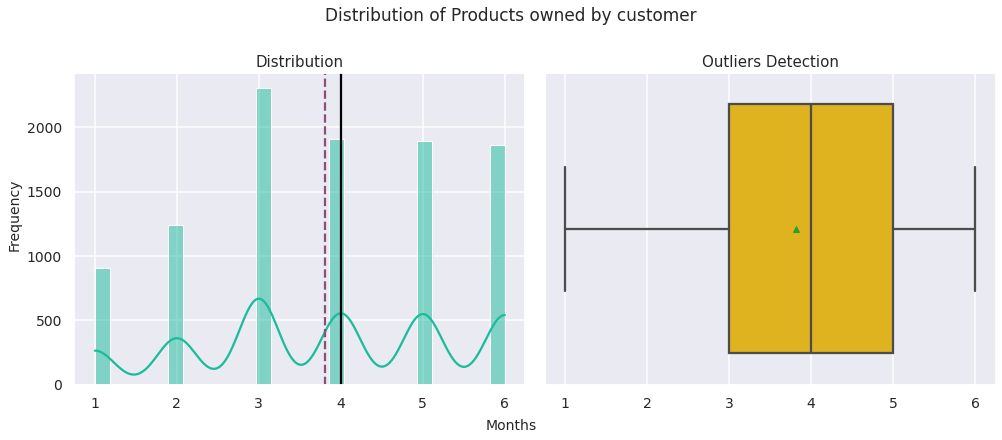

In [21]:
fig, axes = plt.subplots(1,2,figsize=(14, 6))
plt.subplots_adjust(wspace=0.5)
fig.suptitle("Distribution of Products owned by customer", fontsize=17)
fig.text(0.5, 0.0016, 'Months', ha='center', fontsize=14)
fig.text(0.00001, 0.5, 'Frequency', va='center', rotation='vertical', fontsize=14)
sns.set_style("darkgrid",{"axes.facecolour":".9"})
sns.set_context('talk')

ax1=sns.histplot(data, x='total_relationship_count', kde=True, color= '#1abc9c', ax=axes[0])
ax1.axvline(np.mean(data['total_relationship_count']), color='#8C4F78',linestyle='--')
ax1.axvline(np.median(data['total_relationship_count']), color='#000000',linestyle='-')
ax1.tick_params(labelsize=14)
ax1.set(xlabel=None)
ax1.set(ylabel=None)
ax2=sns.boxplot(x=data['total_relationship_count'], color='#FFC300',showmeans=True, ax=axes[1])
ax2.set(xlabel=None)
ax2.set(ylabel=None)
ax2.tick_params(labelsize=14)

fontsize=15
ax1.set_title("Distribution",fontdict={'fontsize': fontsize})
ax2.set_title("Outliers Detection",fontdict={'fontsize': fontsize})

fig.tight_layout()
fig.show()

Total Relationship Count is negatively skewed and has no outlier. 

Most customers have 3 - 4 products

**Months Inactive in 12 Months**

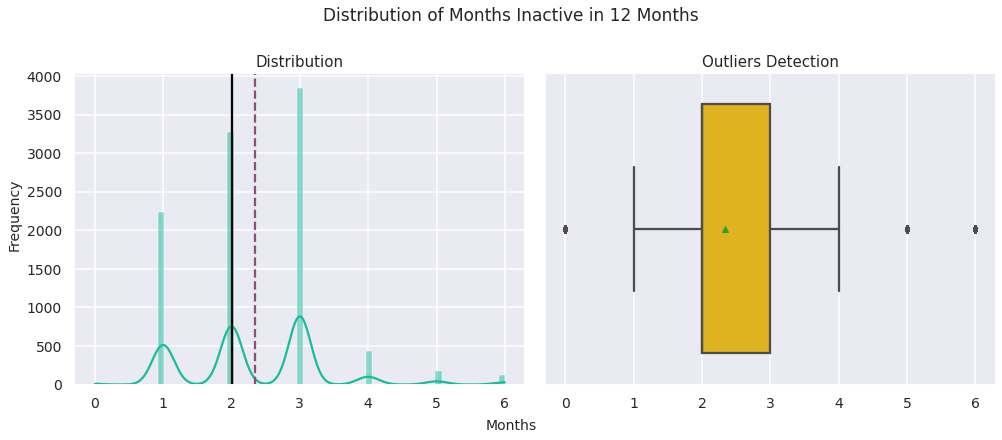

In [22]:
fig, axes = plt.subplots(1,2,figsize=(14, 6))
plt.subplots_adjust(wspace=0.5)
fig.suptitle("Distribution of Months Inactive in 12 Months", fontsize=17)
fig.text(0.5, 0.0016, 'Months', ha='center', fontsize=14)
fig.text(0.00001, 0.5, 'Frequency', va='center', rotation='vertical', fontsize=14)
sns.set_style("darkgrid",{"axes.facecolour":".9"})
sns.set_context('talk')

ax1=sns.histplot(data, x='months_inactive_12_mon', kde=True, color= '#1abc9c', ax=axes[0])
ax1.axvline(np.mean(data['months_inactive_12_mon']), color='#8C4F78',linestyle='--')
ax1.axvline(np.median(data['months_inactive_12_mon']), color='#000000',linestyle='-')
ax1.tick_params(labelsize=14)
ax1.set(xlabel=None)
ax1.set(ylabel=None)
ax2=sns.boxplot(x=data['months_inactive_12_mon'], color='#FFC300',showmeans=True, ax=axes[1])
ax2.set(xlabel=None)
ax2.set(ylabel=None)
ax2.tick_params(labelsize=14)

fontsize=15
ax1.set_title("Distribution",fontdict={'fontsize': fontsize})
ax2.set_title("Outliers Detection",fontdict={'fontsize': fontsize})

fig.tight_layout()
fig.show()

The distribution of months_inactive_12_mon is skewed to the left. The box plot indicates that 0, 5 and 6 months of inactivity of customer is unusual. Few customers has 0 month of inactivity which means they are active. Also, there are few customers who have been inactive half of a year. This unusual observations will not classified as outliers. I will also investigate them. 

**Analysis of Months Inactive in 12 Months**

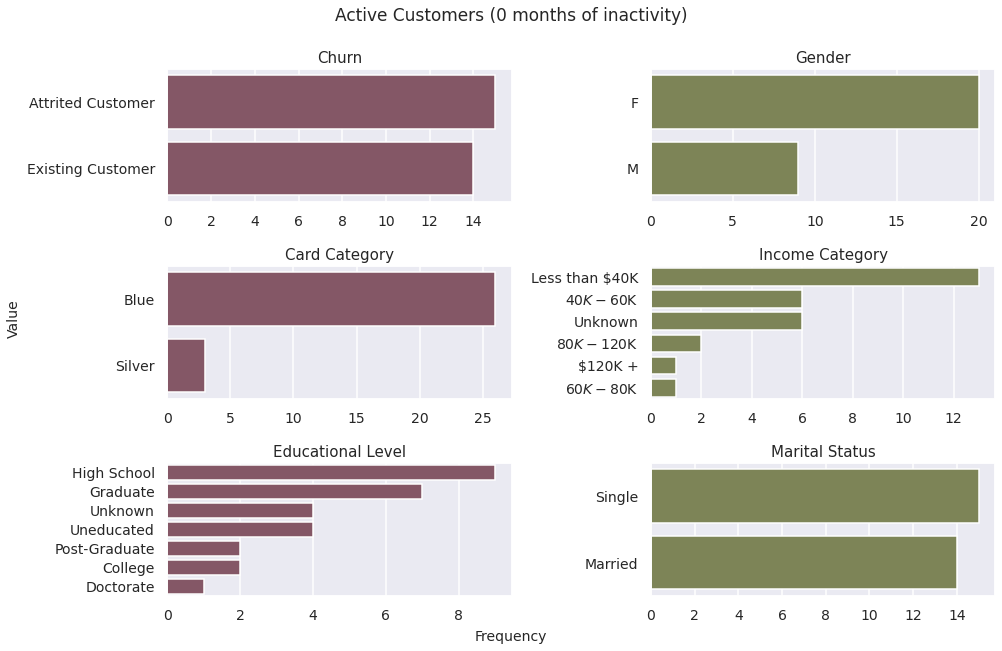

In [23]:
fig, axes = plt.subplots(3, 2, figsize=(14, 9))
plt.subplots_adjust(hspace=0.6, wspace=0.5)
fig.suptitle("Active Customers (0 months of inactivity)", fontsize=17)
fig.text(0.5, 0.0016, 'Frequency', ha='center', fontsize=14)
fig.text(0.00001, 0.5, 'Value', va='center', rotation='vertical', fontsize=14)
sns.set_context('talk')

ax1=sns.countplot(y=data[data.months_inactive_12_mon == 0]['attrition_flag'], color= '#8C4F63', order= data[data.months_inactive_12_mon == 0]['attrition_flag'].value_counts().index, ax=axes[0,0])
ax1.tick_params(labelsize=14)
ax1.set(xlabel=None)
ax1.set(ylabel=None)
ax2=sns.countplot(y=data[data.months_inactive_12_mon == 0]['gender'], color='#828C4F', order= data[data.months_inactive_12_mon == 0]['gender'].value_counts().index, ax=axes[0,1])
ax2.tick_params(labelsize=14)
ax2.set(xlabel=None)
ax2.set(ylabel=None)
ax3=sns.countplot(y=data[data.months_inactive_12_mon == 0]['card_category'], color='#8C4F63', order= data[data.months_inactive_12_mon == 0]['card_category'].value_counts().index, ax=axes[1,0])
ax3.tick_params(labelsize=14)
ax3.set(xlabel=None)
ax3.set(ylabel=None)
ax4=sns.countplot(y=data[data.months_inactive_12_mon == 0]['income_category'], color='#828C4F', order= data[data.months_inactive_12_mon == 0]['income_category'].value_counts().index, ax=axes[1,1])
ax4.tick_params(labelsize=14)
ax4.set(xlabel=None)
ax4.set(ylabel=None)
ax5=sns.countplot(y=data[data.months_inactive_12_mon == 0]['education_level'], color='#8C4F63', order= data[data.months_inactive_12_mon == 0]['education_level'].value_counts().index, ax=axes[2,0])
ax5.tick_params(labelsize=14)
ax5.set(xlabel=None)
ax5.set(ylabel=None)
ax6=sns.countplot(y=data[data.months_inactive_12_mon == 0]['marital_status'], color='#828C4F', order= data[data.months_inactive_12_mon == 0]['marital_status'].value_counts().index, ax=axes[2,1])
ax6.tick_params(labelsize=14)
ax6.set(xlabel=None)
ax6.set(ylabel=None)

fontsize=15
ax1.set_title("Churn",fontdict={'fontsize': fontsize})
ax2.set_title("Gender",fontdict={'fontsize': fontsize})
ax3.set_title("Card Category",fontdict={'fontsize': fontsize})
ax4.set_title("Income Category",fontdict={'fontsize': fontsize})
ax5.set_title("Educational Level",fontdict={'fontsize': fontsize})
ax6.set_title("Marital Status",fontdict={'fontsize': fontsize})

fig.tight_layout()
fig.show()

Despite having a 0 month of inactivity, more customers with this attribute still churned. These are mostly females, with blue card and high school degree.

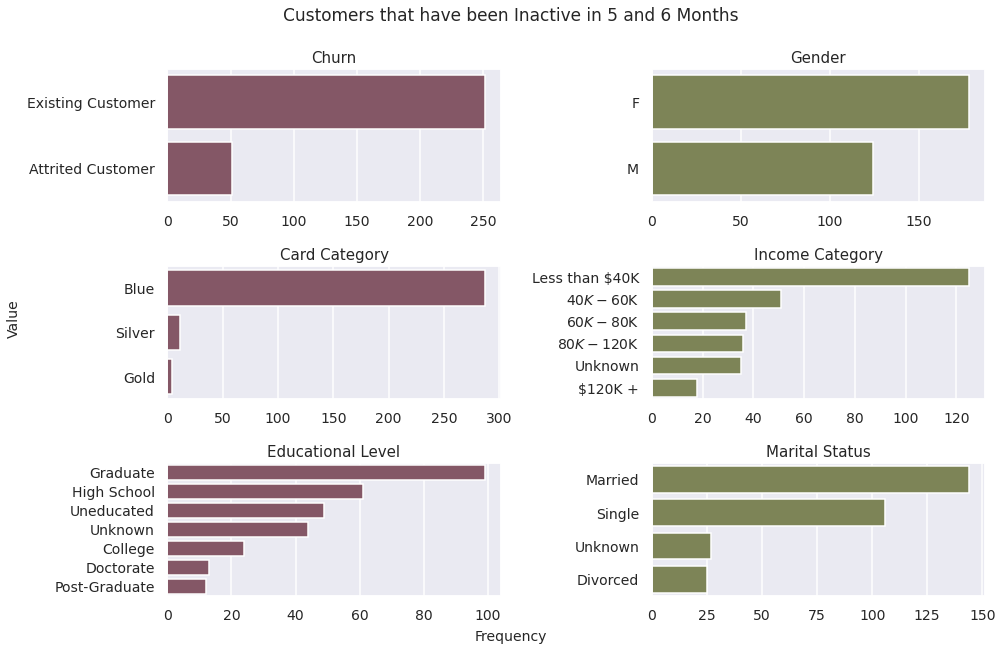

In [24]:
fig, axes = plt.subplots(3, 2, figsize=(14, 9))
plt.subplots_adjust(hspace=0.6, wspace=0.5)
fig.suptitle("Customers that have been Inactive in 5 and 6 Months", fontsize=17)
fig.text(0.5, 0.0016, 'Frequency', ha='center', fontsize=14)
fig.text(0.00001, 0.5, 'Value', va='center', rotation='vertical', fontsize=14)
sns.set_context('talk')

ax1=sns.countplot(y=data[data.months_inactive_12_mon >= 5]['attrition_flag'], color= '#8C4F63', order=data[data.months_inactive_12_mon >= 5]['attrition_flag'].value_counts().index, ax=axes[0,0])
ax1.tick_params(labelsize=14)
ax1.set(xlabel=None)
ax1.set(ylabel=None)
ax2=sns.countplot(y=data[data.months_inactive_12_mon >= 5]['gender'], color='#828C4F', order=data[data.months_inactive_12_mon >= 5]['gender'].value_counts().index, ax=axes[0,1])
ax2.tick_params(labelsize=14)
ax2.set(xlabel=None)
ax2.set(ylabel=None)
ax3=sns.countplot(y=data[data.months_inactive_12_mon >= 5]['card_category'], color='#8C4F63', order=data[data.months_inactive_12_mon >= 5]['card_category'].value_counts().index, ax=axes[1,0])
ax3.tick_params(labelsize=14)
ax3.set(xlabel=None)
ax3.set(ylabel=None)
ax4=sns.countplot(y=data[data.months_inactive_12_mon >= 5]['income_category'], color='#828C4F', order=data[data.months_inactive_12_mon >= 5]['income_category'].value_counts().index, ax=axes[1,1])
ax4.tick_params(labelsize=14)
ax4.set(xlabel=None)
ax4.set(ylabel=None)
ax5=sns.countplot(y=data[data.months_inactive_12_mon >= 5]['education_level'], color='#8C4F63', order=data[data.months_inactive_12_mon >= 5]['education_level'].value_counts().index, ax=axes[2,0])
ax5.tick_params(labelsize=14)
ax5.set(xlabel=None)
ax5.set(ylabel=None)
ax6=sns.countplot(y=data[data.months_inactive_12_mon >= 5]['marital_status'], color='#828C4F', order=data[data.months_inactive_12_mon >= 5]['marital_status'].value_counts().index, ax=axes[2,1])
ax6.tick_params(labelsize=14)
ax6.set(xlabel=None)
ax6.set(ylabel=None)

fontsize=15
ax1.set_title("Churn",fontdict={'fontsize': fontsize})
ax2.set_title("Gender",fontdict={'fontsize': fontsize})
ax3.set_title("Card Category",fontdict={'fontsize': fontsize})
ax4.set_title("Income Category",fontdict={'fontsize': fontsize})
ax5.set_title("Educational Level",fontdict={'fontsize': fontsize})
ax6.set_title("Marital Status",fontdict={'fontsize': fontsize})

fig.tight_layout()
fig.show()

They have more existing customers, graduates and gold credit card. There are divorced customers in the mix too.

**Contacts Count in 12 Months**

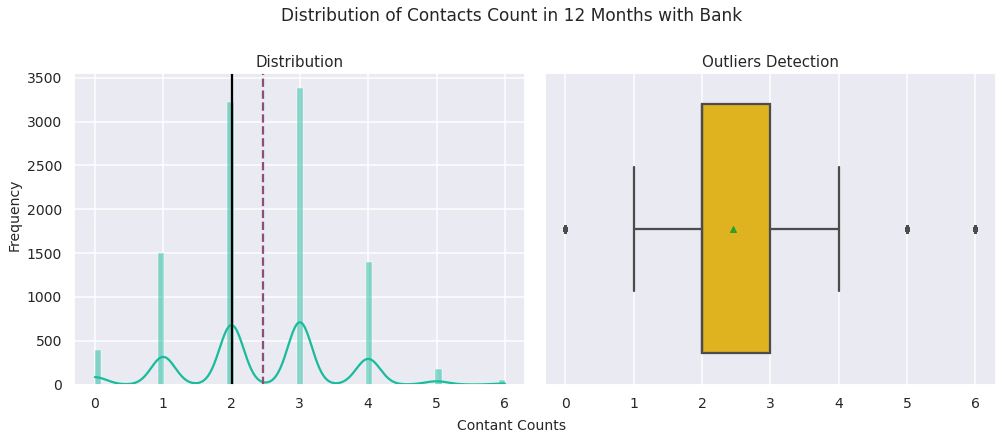

In [25]:
fig, axes = plt.subplots(1,2,figsize=(14, 6))
plt.subplots_adjust(wspace=0.5)
fig.suptitle("Distribution of Contacts Count in 12 Months with Bank", fontsize=17)
fig.text(0.5, 0.0016, 'Contant Counts', ha='center', fontsize=14)
fig.text(0.00001, 0.5, 'Frequency', va='center', rotation='vertical', fontsize=14)
sns.set_style("darkgrid",{"axes.facecolour":".9"})
sns.set_context('talk')

ax1=sns.histplot(data, x='contacts_count_12_mon', kde=True, color= '#1abc9c', ax=axes[0])
ax1.axvline(np.mean(data['contacts_count_12_mon']), color='#8C4F78',linestyle='--')
ax1.axvline(np.median(data['contacts_count_12_mon']), color='#000000',linestyle='-')
ax1.tick_params(labelsize=14)
ax1.set(xlabel=None)
ax1.set(ylabel=None)
ax2=sns.boxplot(x=data['contacts_count_12_mon'], color='#FFC300',showmeans=True, ax=axes[1])
ax2.set(xlabel=None)
ax2.set(ylabel=None)
ax2.tick_params(labelsize=14)

fontsize=15
ax1.set_title("Distribution",fontdict={'fontsize': fontsize})
ax2.set_title("Outliers Detection",fontdict={'fontsize': fontsize})

fig.tight_layout()
fig.show()

The box plot indicates that it unusal to have 0, 5 and 6 contacts with bank. This unusual observations will not classified as outliers. I will also investigate them. 

**Analysis of Contact Counts in 12 months outliers**

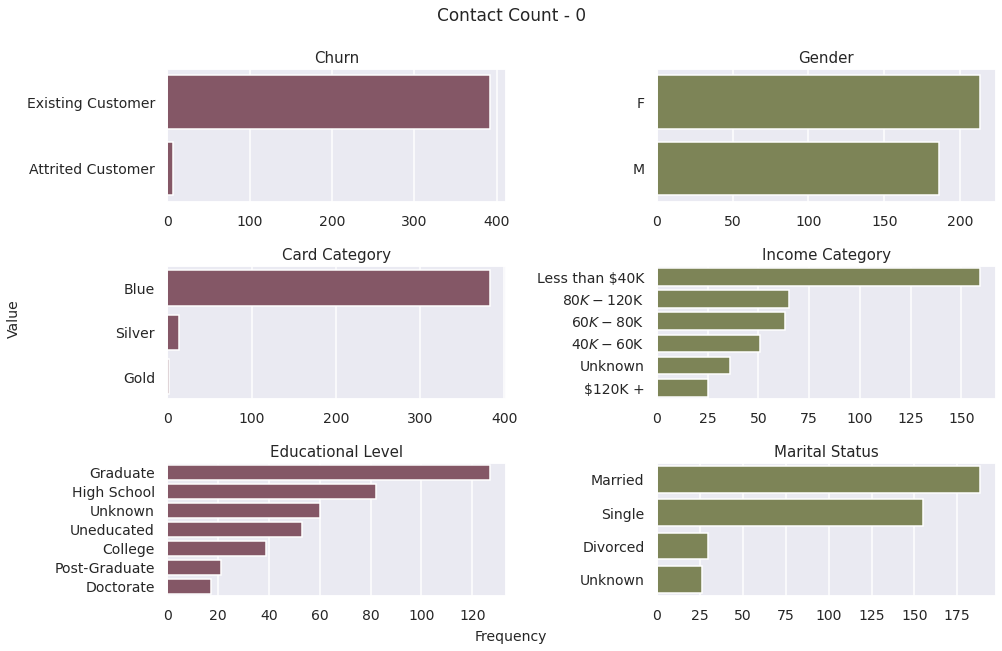

In [26]:
fig, axes = plt.subplots(3, 2, figsize=(14, 9))
plt.subplots_adjust(hspace=0.6, wspace=0.5)
fig.suptitle("Contact Count - 0", fontsize=17)
fig.text(0.5, 0.0016, 'Frequency', ha='center', fontsize=14)
fig.text(0.00001, 0.5, 'Value', va='center', rotation='vertical', fontsize=14)
sns.set_context('talk')

ax1=sns.countplot(y=data[data.contacts_count_12_mon == 0]['attrition_flag'], color= '#8C4F63', order=data[data.contacts_count_12_mon == 0]['attrition_flag'].value_counts().index, ax=axes[0,0])
ax1.tick_params(labelsize=14)
ax1.set(xlabel=None)
ax1.set(ylabel=None)
ax2=sns.countplot(y=data[data.contacts_count_12_mon == 0]['gender'], color='#828C4F', order=data[data.contacts_count_12_mon == 0]['gender'].value_counts().index, ax=axes[0,1])
ax2.tick_params(labelsize=14)
ax2.set(xlabel=None)
ax2.set(ylabel=None)
ax3=sns.countplot(y=data[data.contacts_count_12_mon == 0]['card_category'], color='#8C4F63', order=data[data.contacts_count_12_mon == 0]['card_category'].value_counts().index, ax=axes[1,0])
ax3.tick_params(labelsize=14)
ax3.set(xlabel=None)
ax3.set(ylabel=None)
ax4=sns.countplot(y=data[data.contacts_count_12_mon == 0]['income_category'], color='#828C4F', order=data[data.contacts_count_12_mon == 0]['income_category'].value_counts().index, ax=axes[1,1])
ax4.tick_params(labelsize=14)
ax4.set(xlabel=None)
ax4.set(ylabel=None)
ax5=sns.countplot(y=data[data.contacts_count_12_mon == 0]['education_level'], color='#8C4F63', order=data[data.contacts_count_12_mon == 0]['education_level'].value_counts().index, ax=axes[2,0])
ax5.tick_params(labelsize=14)
ax5.set(xlabel=None)
ax5.set(ylabel=None)
ax6=sns.countplot(y=data[data.contacts_count_12_mon == 0]['marital_status'], color='#828C4F', order=data[data.contacts_count_12_mon == 0]['marital_status'].value_counts().index, ax=axes[2,1])
ax6.tick_params(labelsize=14)
ax6.set(xlabel=None)
ax6.set(ylabel=None)

fontsize=15
ax1.set_title("Churn",fontdict={'fontsize': fontsize})
ax2.set_title("Gender",fontdict={'fontsize': fontsize})
ax3.set_title("Card Category",fontdict={'fontsize': fontsize})
ax4.set_title("Income Category",fontdict={'fontsize': fontsize})
ax5.set_title("Educational Level",fontdict={'fontsize': fontsize})
ax6.set_title("Marital Status",fontdict={'fontsize': fontsize})

fig.tight_layout()
fig.show()

Nearly all the customers that has 0 counts are still customers of the bank and are mostly female.

This indicates a relationship between contact_counts and churn.

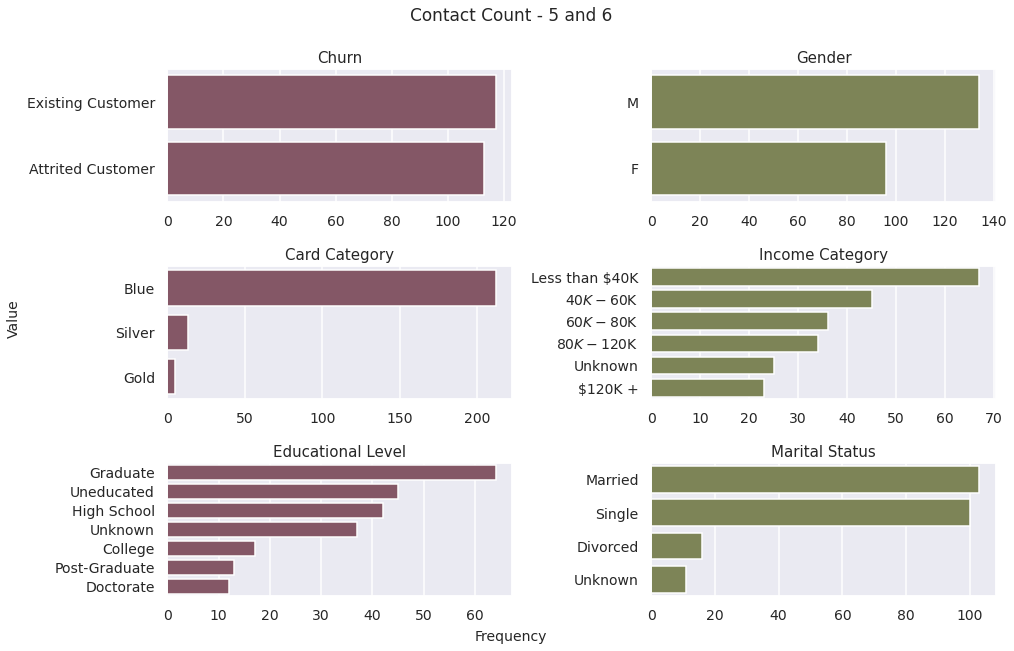

In [27]:
fig, axes = plt.subplots(3, 2, figsize=(14, 9))
plt.subplots_adjust(hspace=0.6, wspace=0.5)
fig.suptitle("Contact Count - 5 and 6", fontsize=17)
fig.text(0.5, 0.0016, 'Frequency', ha='center', fontsize=14)
fig.text(0.00001, 0.5, 'Value', va='center', rotation='vertical', fontsize=14)
sns.set_context('talk')

ax1=sns.countplot(y=data[data.contacts_count_12_mon >= 5]['attrition_flag'], color= '#8C4F63', order=data[data.contacts_count_12_mon >= 5]['attrition_flag'].value_counts().index, ax=axes[0,0])
ax1.tick_params(labelsize=14)
ax1.set(xlabel=None)
ax1.set(ylabel=None)
ax2=sns.countplot(y=data[data.contacts_count_12_mon >= 5]['gender'], color='#828C4F', order=data[data.contacts_count_12_mon >= 5]['gender'].value_counts().index, ax=axes[0,1])
ax2.tick_params(labelsize=14)
ax2.set(xlabel=None)
ax2.set(ylabel=None)
ax3=sns.countplot(y=data[data.contacts_count_12_mon >= 5]['card_category'], order=data[data.contacts_count_12_mon >= 5]['card_category'].value_counts().index, color='#8C4F63',ax=axes[1,0])
ax3.tick_params(labelsize=14)
ax3.set(xlabel=None)
ax3.set(ylabel=None)
ax4=sns.countplot(y=data[data.contacts_count_12_mon >= 5]['income_category'], order=data[data.contacts_count_12_mon >= 5]['income_category'].value_counts().index, color='#828C4F', ax=axes[1,1])
ax4.tick_params(labelsize=14)
ax4.set(xlabel=None)
ax4.set(ylabel=None)
ax5=sns.countplot(y=data[data.contacts_count_12_mon >= 5]['education_level'], order=data[data.contacts_count_12_mon >= 5]['education_level'].value_counts().index, color='#8C4F63',ax=axes[2,0])
ax5.tick_params(labelsize=14)
ax5.set(xlabel=None)
ax5.set(ylabel=None)
ax6=sns.countplot(y=data[data.contacts_count_12_mon >= 5]['marital_status'], order=data[data.contacts_count_12_mon >= 5]['marital_status'].value_counts().index, color='#828C4F', ax=axes[2,1])
ax6.tick_params(labelsize=14)
ax6.set(xlabel=None)
ax6.set(ylabel=None)

fontsize=15
ax1.set_title("Churn",fontdict={'fontsize': fontsize})
ax2.set_title("Gender",fontdict={'fontsize': fontsize})
ax3.set_title("Card Category",fontdict={'fontsize': fontsize})
ax4.set_title("Income Category",fontdict={'fontsize': fontsize})
ax5.set_title("Educational Level",fontdict={'fontsize': fontsize})
ax6.set_title("Marital Status",fontdict={'fontsize': fontsize})

fig.tight_layout()
fig.show()

The percentage of customers that have churned are more here than the 0 contact counts and they are mostly males.

**Credit Limit**

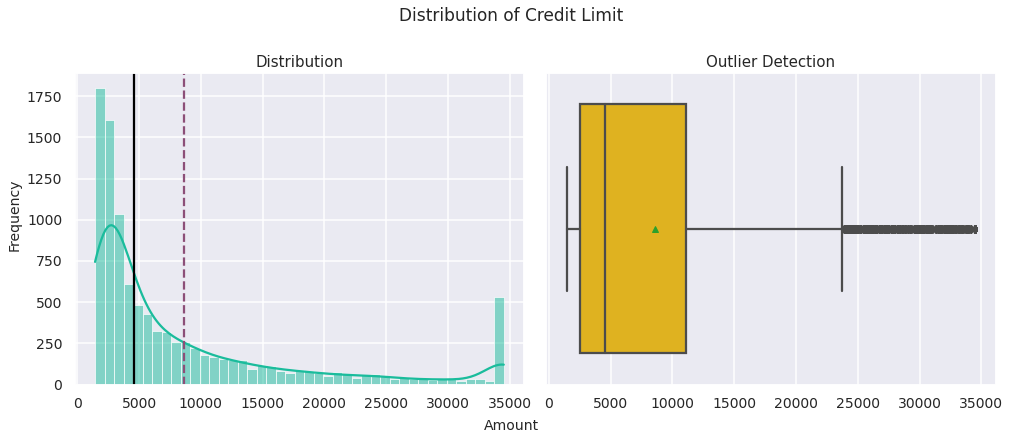

In [28]:
fig, axes = plt.subplots(1,2,figsize=(14, 6))
plt.subplots_adjust(wspace=0.5)
fig.suptitle("Distribution of Credit Limit", fontsize=17)
fig.text(0.5, 0.0016, 'Amount', ha='center', fontsize=14)
fig.text(0.00001, 0.5, 'Frequency', va='center', rotation='vertical', fontsize=14)
sns.set_style("darkgrid",{"axes.facecolour":".9"})
sns.set_context('talk')

ax1=sns.histplot(data, x='credit_limit', kde=True, color= '#1abc9c', ax=axes[0])
ax1.axvline(np.mean(data['credit_limit']), color='#8C4F78',linestyle='--')
ax1.axvline(np.median(data['credit_limit']), color='#000000',linestyle='-')
ax1.tick_params(labelsize=14)
ax1.set(xlabel=None)
ax1.set(ylabel=None)
ax2=sns.boxplot(x=data['credit_limit'], color='#FFC300',showmeans=True, ax=axes[1])
ax2.set(xlabel=None)
ax2.set(ylabel=None)
ax2.tick_params(labelsize=14)

fontsize=15
ax1.set_title("Distribution",fontdict={'fontsize': fontsize})
ax2.set_title("Outlier Detection",fontdict={'fontsize': fontsize})

fig.tight_layout()
fig.show()

The credit limit of customers is skewed to the right.

It has higher end outliers.

**Analysis of credit limit outliers**

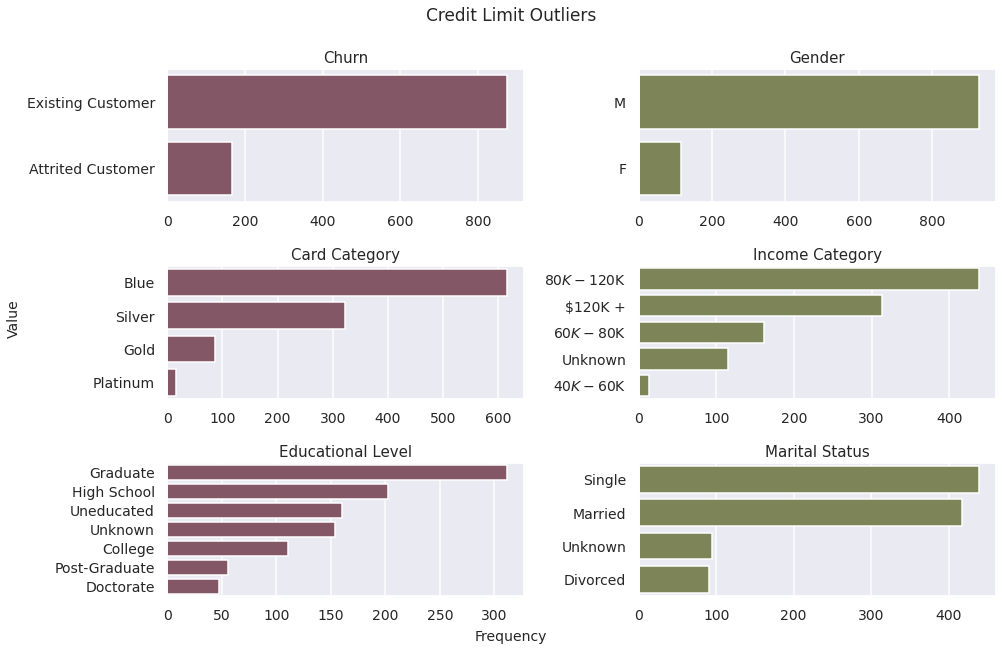

In [29]:
fig, axes = plt.subplots(3, 2, figsize=(14, 9))
plt.subplots_adjust(hspace=0.6, wspace=0.5)
fig.suptitle("Credit Limit Outliers", fontsize=17)
fig.text(0.5, 0.0016, 'Frequency', ha='center', fontsize=14)
fig.text(0.00001, 0.5, 'Value', va='center', rotation='vertical', fontsize=14)
sns.set_context('talk')

ax1=sns.countplot(y=data[data.credit_limit >= 23000]['attrition_flag'], color= '#8C4F63', order=data[data.credit_limit >= 23000]['attrition_flag'].value_counts().index, ax=axes[0,0])
ax1.tick_params(labelsize=14)
ax1.set(xlabel=None)
ax1.set(ylabel=None)
ax2=sns.countplot(y=data[data.credit_limit >= 23000]['gender'], color='#828C4F', order=data[data.credit_limit >= 23000]['gender'].value_counts().index, ax=axes[0,1])
ax2.tick_params(labelsize=14)
ax2.set(xlabel=None)
ax2.set(ylabel=None)
ax3=sns.countplot(y=data[data.credit_limit >= 23000]['card_category'], color='#8C4F63', order=data[data.credit_limit >= 23000]['card_category'].value_counts().index, ax=axes[1,0])
ax3.tick_params(labelsize=14)
ax3.set(xlabel=None)
ax3.set(ylabel=None)
ax4=sns.countplot(y=data[data.credit_limit >= 23000]['income_category'], color='#828C4F', order=data[data.credit_limit >= 23000]['income_category'].value_counts().index, ax=axes[1,1])
ax4.tick_params(labelsize=14)
ax4.set(xlabel=None)
ax4.set(ylabel=None)
ax5=sns.countplot(y=data[data.credit_limit >= 23000]['education_level'], color='#8C4F63', order=data[data.credit_limit >= 23000]['education_level'].value_counts().index, ax=axes[2,0])
ax5.tick_params(labelsize=14)
ax5.set(xlabel=None)
ax5.set(ylabel=None)
ax6=sns.countplot(y=data[data.credit_limit >= 23000]['marital_status'], color='#828C4F', order=data[data.credit_limit >= 23000]['marital_status'].value_counts().index, ax=axes[2,1])
ax6.tick_params(labelsize=14)
ax6.set(xlabel=None)
ax6.set(ylabel=None)

fontsize=15
ax1.set_title("Churn",fontdict={'fontsize': fontsize})
ax2.set_title("Gender",fontdict={'fontsize': fontsize})
ax3.set_title("Card Category",fontdict={'fontsize': fontsize})
ax4.set_title("Income Category",fontdict={'fontsize': fontsize})
ax5.set_title("Educational Level",fontdict={'fontsize': fontsize})
ax6.set_title("Marital Status",fontdict={'fontsize': fontsize})

fig.tight_layout()
fig.show()

The customers in this outlier group are high earning customers, it has customers in all card category but 90% blue and silver, and 85% existing customers. 

This is new because this is the first category that has all the card category in considerable number.

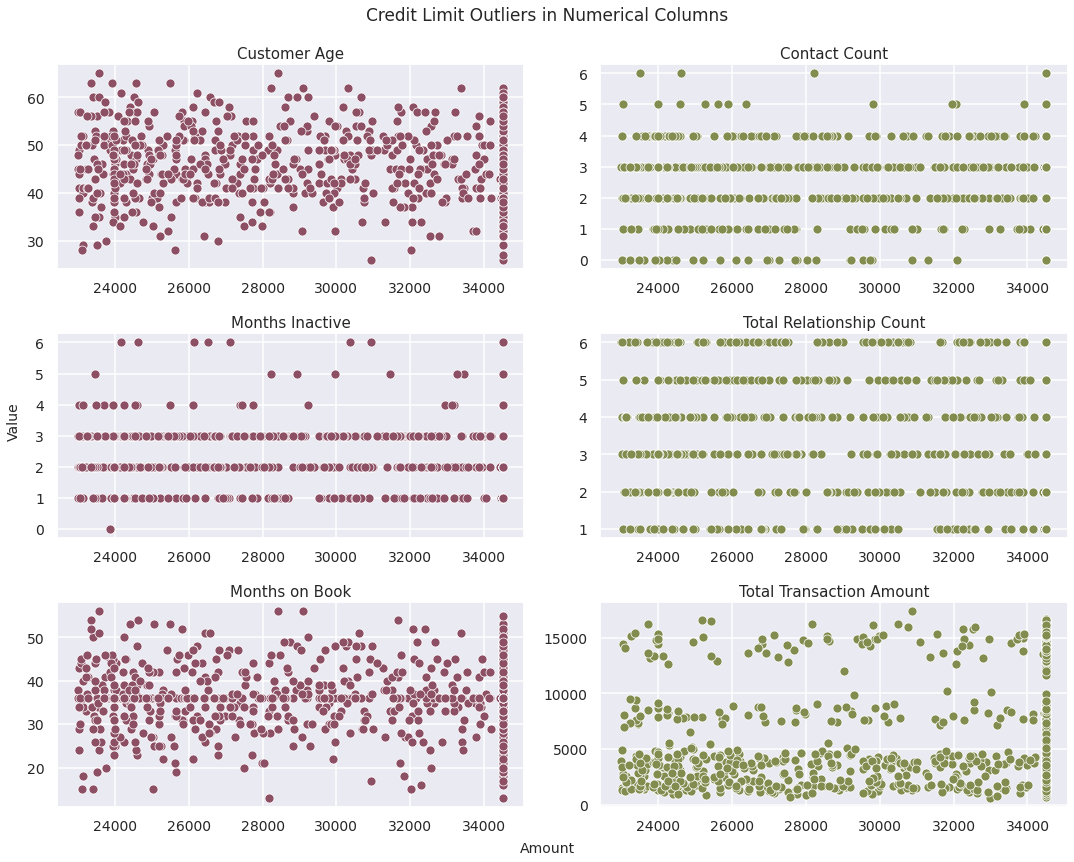

In [30]:
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.6, wspace=0.5)
fig.suptitle("Credit Limit Outliers in Numerical Columns", fontsize=17)
fig.text(0.5, 0.0016, 'Amount', ha='center', fontsize=14)
fig.text(0.00001, 0.5, 'Value', va='center', rotation='vertical', fontsize=14)
sns.set_context('talk')

ax1=sns.scatterplot(data=data[data.credit_limit >= 23000], x = 'credit_limit', y='customer_age',color= '#8C4F63',ax=axes[0,0])
ax1.tick_params(labelsize=14)
ax1.set(xlabel=None)
ax1.set(ylabel=None)
ax2=sns.scatterplot(data=data[data.credit_limit >= 23000], x = 'credit_limit', y='contacts_count_12_mon', color='#828C4F', ax=axes[0,1])
ax2.tick_params(labelsize=14)
ax2.set(xlabel=None)
ax2.set(ylabel=None)
ax3=sns.scatterplot(data=data[data.credit_limit >= 23000], x = 'credit_limit', y='months_inactive_12_mon',color='#8C4F63',ax=axes[1,0])
ax3.tick_params(labelsize=14)
ax3.set(xlabel=None)
ax3.set(ylabel=None)
ax4=sns.scatterplot(data=data[data.credit_limit >= 23000], x = 'credit_limit', y='total_relationship_count', color='#828C4F', ax=axes[1,1])
ax4.tick_params(labelsize=14)
ax4.set(xlabel=None)
ax4.set(ylabel=None)
ax5=sns.scatterplot(data=data[data.credit_limit >= 23000], x = 'credit_limit', y='months_on_book',color='#8C4F63',ax=axes[2,0])
ax5.tick_params(labelsize=14)
ax5.set(xlabel=None)
ax5.set(ylabel=None)
ax6=sns.scatterplot(data=data[data.credit_limit >= 23000], x = 'credit_limit', y='total_trans_amt',color='#828C4F', ax=axes[2,1])
ax6.tick_params(labelsize=14)
ax6.set(xlabel=None)
ax6.set(ylabel=None)

fontsize=15
ax1.set_title("Customer Age",fontdict={'fontsize': fontsize})
ax2.set_title("Contact Count",fontdict={'fontsize': fontsize})
ax3.set_title("Months Inactive",fontdict={'fontsize': fontsize})
ax4.set_title("Total Relationship Count",fontdict={'fontsize': fontsize})
ax5.set_title("Months on Book",fontdict={'fontsize': fontsize})
ax6.set_title("Total Transaction Amount",fontdict={'fontsize': fontsize})

fig.tight_layout()
fig.show()

There is no linear relationship between outliers in credit limit and other numerical columns.

The high credit limit customers are middle aged.

Total transaction amount seems to have three segments.

**Total Revolving Balance**

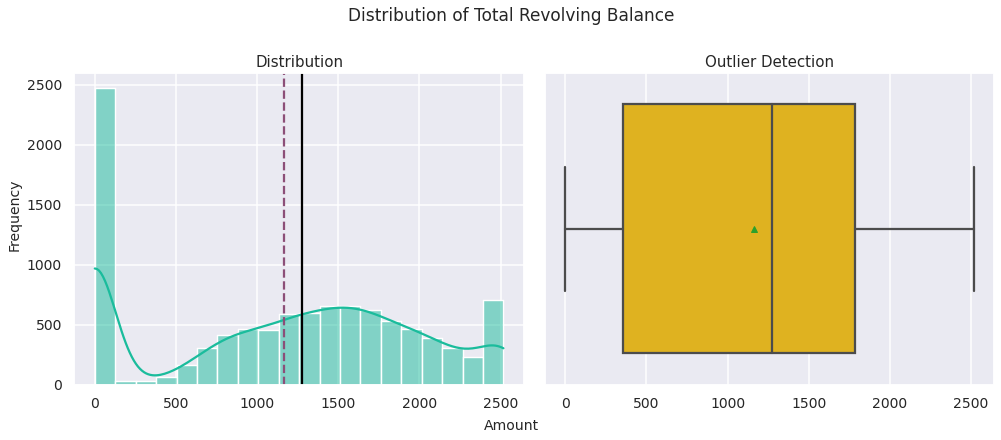

In [31]:
fig, axes = plt.subplots(1,2,figsize=(14, 6))
plt.subplots_adjust(wspace=0.5)
fig.suptitle("Distribution of Total Revolving Balance", fontsize=17)
fig.text(0.5, 0.0016, 'Amount', ha='center', fontsize=14)
fig.text(0.00001, 0.5, 'Frequency', va='center', rotation='vertical', fontsize=14)
sns.set_style("darkgrid",{"axes.facecolour":".9"})
sns.set_context('talk')

ax1=sns.histplot(data, x='total_revolving_bal', kde=True, color= '#1abc9c', ax=axes[0])
ax1.axvline(np.mean(data['total_revolving_bal']), color='#8C4F78',linestyle='--')
ax1.axvline(np.median(data['total_revolving_bal']), color='#000000',linestyle='-')
ax1.tick_params(labelsize=14)
ax1.set(xlabel=None)
ax1.set(ylabel=None)
ax2=sns.boxplot(x=data['total_revolving_bal'], color='#FFC300',showmeans=True, ax=axes[1])
ax2.set(xlabel=None)
ax2.set(ylabel=None)
ax2.tick_params(labelsize=14)

fontsize=15
ax1.set_title("Distribution",fontdict={'fontsize': fontsize})
ax2.set_title("Outlier Detection",fontdict={'fontsize': fontsize})

fig.tight_layout()
fig.show()

Most customers have a total revolving balance of 0. This means they are not using their credit cards. 

It has no outliers.

**Average Open to Buy**

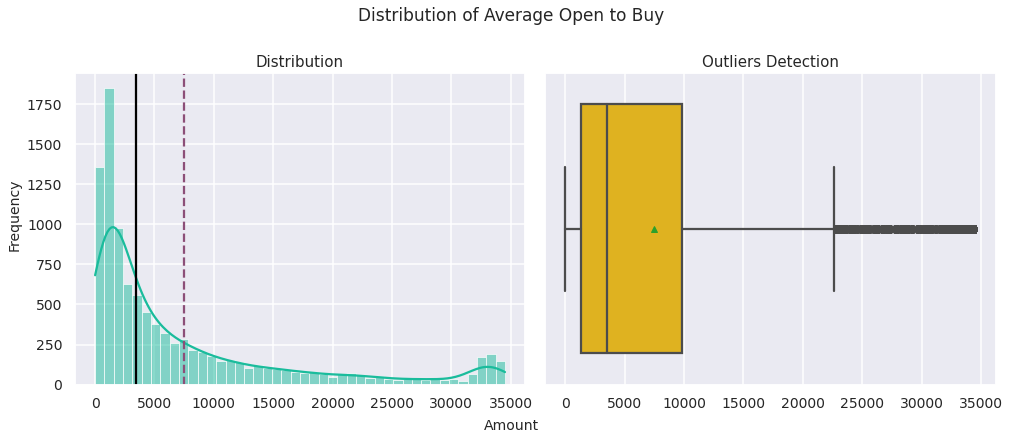

In [32]:
fig, axes = plt.subplots(1,2,figsize=(14, 6))
plt.subplots_adjust(wspace=0.5)
fig.suptitle("Distribution of Average Open to Buy", fontsize=17)
fig.text(0.5, 0.0016, 'Amount', ha='center', fontsize=14)
fig.text(0.00001, 0.5, 'Frequency', va='center', rotation='vertical', fontsize=14)
sns.set_style("darkgrid",{"axes.facecolour":".9"})
sns.set_context('talk')

ax1=sns.histplot(data, x='avg_open_to_buy', kde=True, color= '#1abc9c', ax=axes[0])
ax1.axvline(np.mean(data['avg_open_to_buy']), color='#8C4F78',linestyle='--')
ax1.axvline(np.median(data['avg_open_to_buy']), color='#000000',linestyle='-')
ax1.tick_params(labelsize=14)
ax1.set(xlabel=None)
ax1.set(ylabel=None)
ax2=sns.boxplot(x=data['avg_open_to_buy'], color='#FFC300',showmeans=True, ax=axes[1])
ax2.set(xlabel=None)
ax2.set(ylabel=None)
ax2.tick_params(labelsize=14)

fontsize=15
ax1.set_title("Distribution",fontdict={'fontsize': fontsize})
ax2.set_title("Outliers Detection",fontdict={'fontsize': fontsize})

fig.tight_layout()
fig.show()

This is skewed to the right like credit limit column.

It also has higher end outliers and this means that some customers are using very small amount of their credit limit.

**Analysis of Average Open to Buy Outlier**

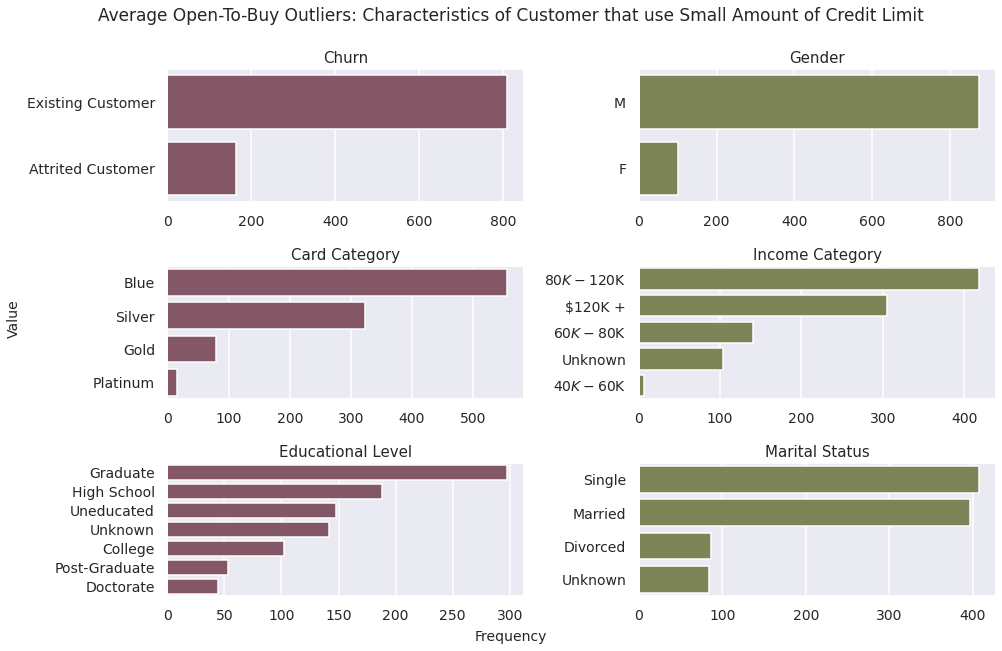

In [33]:
fig, axes = plt.subplots(3, 2, figsize=(14, 9))
plt.subplots_adjust(hspace=0.6, wspace=0.5)
fig.suptitle("Average Open-To-Buy Outliers: Characteristics of Customer that use Small Amount of Credit Limit", fontsize=17)
fig.text(0.5, 0.0016, 'Frequency', ha='center', fontsize=14)
fig.text(0.00001, 0.5, 'Value', va='center', rotation='vertical', fontsize=14)
sns.set_context('talk')

ax1=sns.countplot(y=data[data.avg_open_to_buy >= 22500]['attrition_flag'], color= '#8C4F63', order=data[data.avg_open_to_buy >= 22500]['attrition_flag'].value_counts().index, ax=axes[0,0])
ax1.tick_params(labelsize=14)
ax1.set(xlabel=None)
ax1.set(ylabel=None)
ax2=sns.countplot(y=data[data.avg_open_to_buy >= 22500]['gender'], color='#828C4F', order=data[data.avg_open_to_buy >= 22500]['gender'].value_counts().index, ax=axes[0,1])
ax2.tick_params(labelsize=14)
ax2.set(xlabel=None)
ax2.set(ylabel=None)
ax3=sns.countplot(y=data[data.avg_open_to_buy >= 22500]['card_category'], color='#8C4F63', order=data[data.avg_open_to_buy >= 22500]['card_category'].value_counts().index, ax=axes[1,0])
ax3.tick_params(labelsize=14)
ax3.set(xlabel=None)
ax3.set(ylabel=None)
ax4=sns.countplot(y=data[data.avg_open_to_buy >= 22500]['income_category'], color='#828C4F', order=data[data.avg_open_to_buy >= 22500]['income_category'].value_counts().index, ax=axes[1,1])
ax4.tick_params(labelsize=14)
ax4.set(xlabel=None)
ax4.set(ylabel=None)
ax5=sns.countplot(y=data[data.avg_open_to_buy >= 22500]['education_level'], color='#8C4F63', order=data[data.avg_open_to_buy >= 22500]['education_level'].value_counts().index, ax=axes[2,0])
ax5.tick_params(labelsize=14)
ax5.set(xlabel=None)
ax5.set(ylabel=None)
ax6=sns.countplot(y=data[data.avg_open_to_buy >= 22500]['marital_status'], color='#828C4F', order=data[data.avg_open_to_buy >= 22500]['marital_status'].value_counts().index, ax=axes[2,1])
ax6.tick_params(labelsize=14)
ax6.set(xlabel=None)
ax6.set(ylabel=None)

fontsize=15
ax1.set_title("Churn",fontdict={'fontsize': fontsize})
ax2.set_title("Gender",fontdict={'fontsize': fontsize})
ax3.set_title("Card Category",fontdict={'fontsize': fontsize})
ax4.set_title("Income Category",fontdict={'fontsize': fontsize})
ax5.set_title("Educational Level",fontdict={'fontsize': fontsize})
ax6.set_title("Marital Status",fontdict={'fontsize': fontsize})

fig.tight_layout()
fig.show()

This is very similar to credit limit outlier. There is either a strong correlation between credit limit outlier and average open-to-buy or a collinearlity. We'll find out later.

Also, customers with high average open-to-buy are high income earners, a very minute number of customers in this category have an income of 40k-60k as the least income category. Also, they are mostly male.

It also has customers with blue, silver, gold and platinum card category, with over 90% blue and silver cards.

Most of the customers here are still existing.

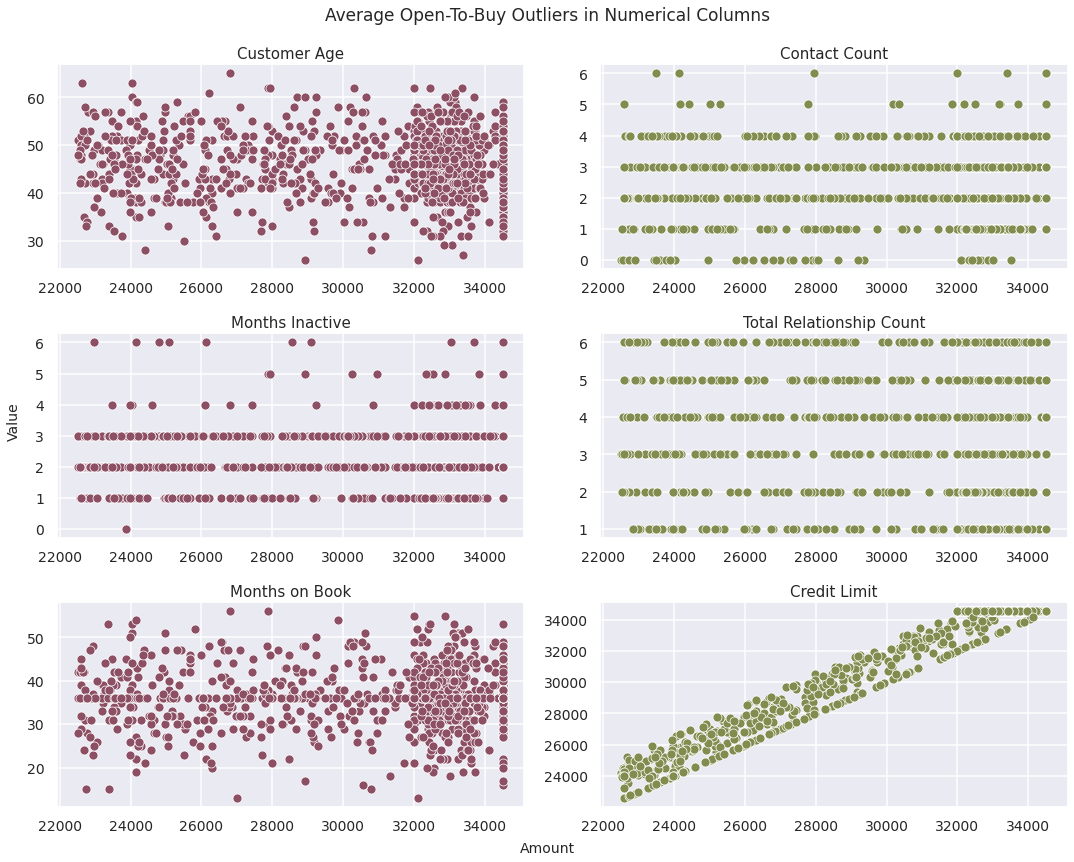

In [34]:
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.6, wspace=0.5)
fig.suptitle("Average Open-To-Buy Outliers in Numerical Columns", fontsize=17)
fig.text(0.5, 0.0016, 'Amount', ha='center', fontsize=14)
fig.text(0.00001, 0.5, 'Value', va='center', rotation='vertical', fontsize=14)
sns.set_context('talk')

ax1=sns.scatterplot(data=data[data.avg_open_to_buy >= 22500], x = 'avg_open_to_buy', y='customer_age',color= '#8C4F63',ax=axes[0,0])
ax1.tick_params(labelsize=14)
ax1.set(xlabel=None)
ax1.set(ylabel=None)
ax2=sns.scatterplot(data=data[data.avg_open_to_buy >= 22500], x = 'avg_open_to_buy', y='contacts_count_12_mon', color='#828C4F', ax=axes[0,1])
ax2.tick_params(labelsize=14)
ax2.set(xlabel=None)
ax2.set(ylabel=None)
ax3=sns.scatterplot(data=data[data.avg_open_to_buy >= 22500], x = 'avg_open_to_buy', y='months_inactive_12_mon',color='#8C4F63',ax=axes[1,0])
ax3.tick_params(labelsize=14)
ax3.set(xlabel=None)
ax3.set(ylabel=None)
ax4=sns.scatterplot(data=data[data.avg_open_to_buy >= 22500], x = 'avg_open_to_buy', y='total_relationship_count', color='#828C4F', ax=axes[1,1])
ax4.tick_params(labelsize=14)
ax4.set(xlabel=None)
ax4.set(ylabel=None)
ax5=sns.scatterplot(data=data[data.avg_open_to_buy >= 22500], x = 'avg_open_to_buy', y='months_on_book',color='#8C4F63',ax=axes[2,0])
ax5.tick_params(labelsize=14)
ax5.set(xlabel=None)
ax5.set(ylabel=None)
ax6=sns.scatterplot(data=data[data.avg_open_to_buy >= 22500], x = 'avg_open_to_buy', y='credit_limit',color='#828C4F', ax=axes[2,1])
ax6.tick_params(labelsize=14)
ax6.set(xlabel=None)
ax6.set(ylabel=None)

fontsize=15
ax1.set_title("Customer Age",fontdict={'fontsize': fontsize})
ax2.set_title("Contact Count",fontdict={'fontsize': fontsize})
ax3.set_title("Months Inactive",fontdict={'fontsize': fontsize})
ax4.set_title("Total Relationship Count",fontdict={'fontsize': fontsize})
ax5.set_title("Months on Book",fontdict={'fontsize': fontsize})
ax6.set_title("Credit Limit",fontdict={'fontsize': fontsize})

fig.tight_layout()
fig.show()

There is a positive linear relationship between the outliers in Average Open-To-Buy and Credit Limit.

There is a cluster in the middle aged group, this suggests that most middle aged customers have 32,000 to 34,000 average open-to-buy.

**Total Amount Change from Q4 to Q1**

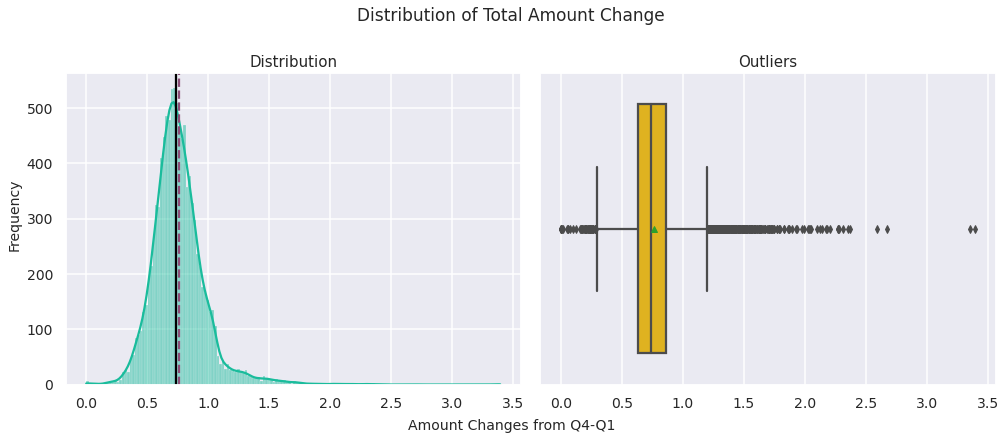

In [35]:
fig, axes = plt.subplots(1,2,figsize=(14, 6))
plt.subplots_adjust(wspace=0.5)
fig.suptitle("Distribution of Total Amount Change", fontsize=17)
fig.text(0.5, 0.0016, 'Amount Changes from Q4-Q1', ha='center', fontsize=14)
fig.text(0.00001, 0.5, 'Frequency', va='center', rotation='vertical', fontsize=14)
sns.set_style("darkgrid",{"axes.facecolour":".9"})
sns.set_context('talk')

ax1=sns.histplot(data, x='total_amt_chng_q4_q1', kde=True, color= '#1abc9c', ax=axes[0])
ax1.axvline(np.mean(data['total_amt_chng_q4_q1']), color='#8C4F78',linestyle='--')
ax1.axvline(np.median(data['total_amt_chng_q4_q1']), color='#000000',linestyle='-')
ax1.tick_params(labelsize=14)
ax1.set(xlabel=None)
ax1.set(ylabel=None)
ax2=sns.boxplot(x=data['total_amt_chng_q4_q1'], color='#FFC300',showmeans=True, ax=axes[1])
ax2.set(xlabel=None)
ax2.set(ylabel=None)
ax2.tick_params(labelsize=14)

fontsize=15
ax1.set_title("Distribution",fontdict={'fontsize': fontsize})
ax2.set_title("Outliers",fontdict={'fontsize': fontsize})

fig.tight_layout()
fig.show()

Similar to the sitaution with Months_on_book, let's find out if Total Amount Change is normally distributed, given that it has outliers.

In [36]:
print('skewness-kurtosis all: {}'.format(data['total_amt_chng_q4_q1'].kurt()))

skewness-kurtosis all: 9.993501178599228


The data has a kurtosis of >3.0, it is not normally distributed.

It has a higher and lower end outliers

Let's investigate

**Analysis of Total Amount Change from Q4 to Q1**

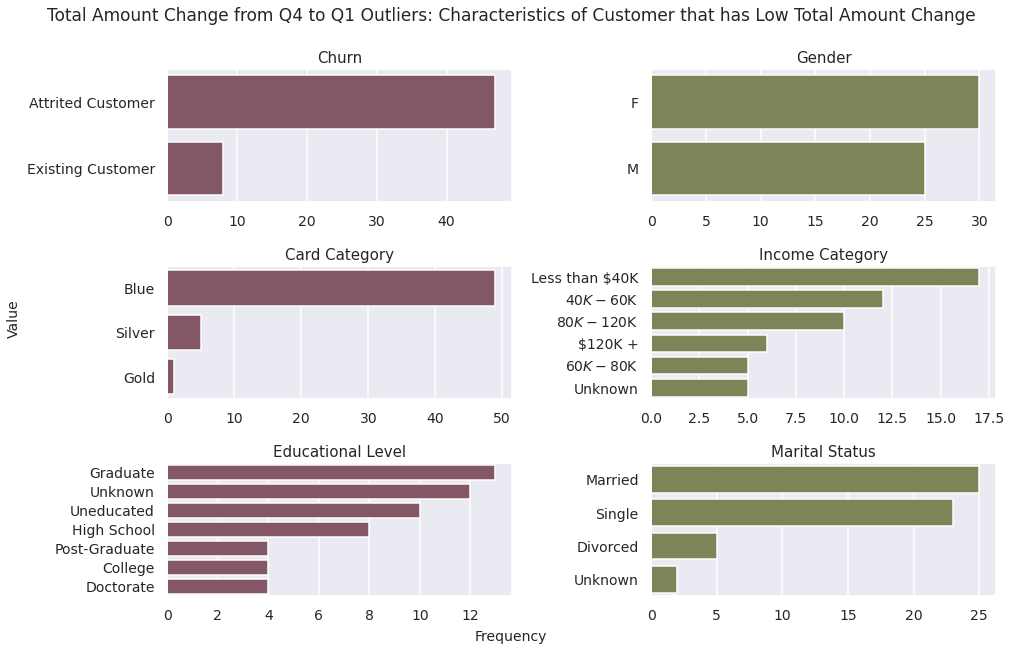

In [37]:
fig, axes = plt.subplots(3, 2, figsize=(14, 9))
plt.subplots_adjust(hspace=0.6, wspace=0.5)
fig.suptitle("Total Amount Change from Q4 to Q1 Outliers: Characteristics of Customer that has Low Total Amount Change", fontsize=17)
fig.text(0.5, 0.0016, 'Frequency', ha='center', fontsize=14)
fig.text(0.00001, 0.5, 'Value', va='center', rotation='vertical', fontsize=14)
sns.set_context('talk')

ax1=sns.countplot(y=data[data.total_amt_chng_q4_q1 <= 0.3]['attrition_flag'], color= '#8C4F63', order=data[data.total_amt_chng_q4_q1 <= 0.3]['attrition_flag'].value_counts().index, ax=axes[0,0])
ax1.tick_params(labelsize=14)
ax1.set(xlabel=None)
ax1.set(ylabel=None)
ax2=sns.countplot(y=data[data.total_amt_chng_q4_q1 <= 0.3]['gender'], color='#828C4F', order=data[data.total_amt_chng_q4_q1 <= 0.3]['gender'].value_counts().index, ax=axes[0,1])
ax2.tick_params(labelsize=14)
ax2.set(xlabel=None)
ax2.set(ylabel=None)
ax3=sns.countplot(y=data[data.total_amt_chng_q4_q1 <= 0.3]['card_category'], color='#8C4F63', order=data[data.total_amt_chng_q4_q1 <= 0.3]['card_category'].value_counts().index, ax=axes[1,0])
ax3.tick_params(labelsize=14)
ax3.set(xlabel=None)
ax3.set(ylabel=None)
ax4=sns.countplot(y=data[data.total_amt_chng_q4_q1 <= 0.3]['income_category'], color='#828C4F',  order=data[data.total_amt_chng_q4_q1 <= 0.3]['income_category'].value_counts().index, ax=axes[1,1])
ax4.tick_params(labelsize=14)
ax4.set(xlabel=None)
ax4.set(ylabel=None)
ax5=sns.countplot(y=data[data.total_amt_chng_q4_q1 <= 0.3]['education_level'], color='#8C4F63', order=data[data.total_amt_chng_q4_q1 <= 0.3]['education_level'].value_counts().index, ax=axes[2,0])
ax5.tick_params(labelsize=14)
ax5.set(xlabel=None)
ax5.set(ylabel=None)
ax6=sns.countplot(y=data[data.total_amt_chng_q4_q1 <= 0.3]['marital_status'], color='#828C4F',  order=data[data.total_amt_chng_q4_q1 <= 0.3]['marital_status'].value_counts().index, ax=axes[2,1])
ax6.tick_params(labelsize=14)
ax6.set(xlabel=None)
ax6.set(ylabel=None)

fontsize=15
ax1.set_title("Churn",fontdict={'fontsize': fontsize})
ax2.set_title("Gender",fontdict={'fontsize': fontsize})
ax3.set_title("Card Category",fontdict={'fontsize': fontsize})
ax4.set_title("Income Category",fontdict={'fontsize': fontsize})
ax5.set_title("Educational Level",fontdict={'fontsize': fontsize})
ax6.set_title("Marital Status",fontdict={'fontsize': fontsize})

fig.tight_layout()
fig.show()

Most customers with low transaction amount change have high churners. They are also mostly females and have more of low income categories.

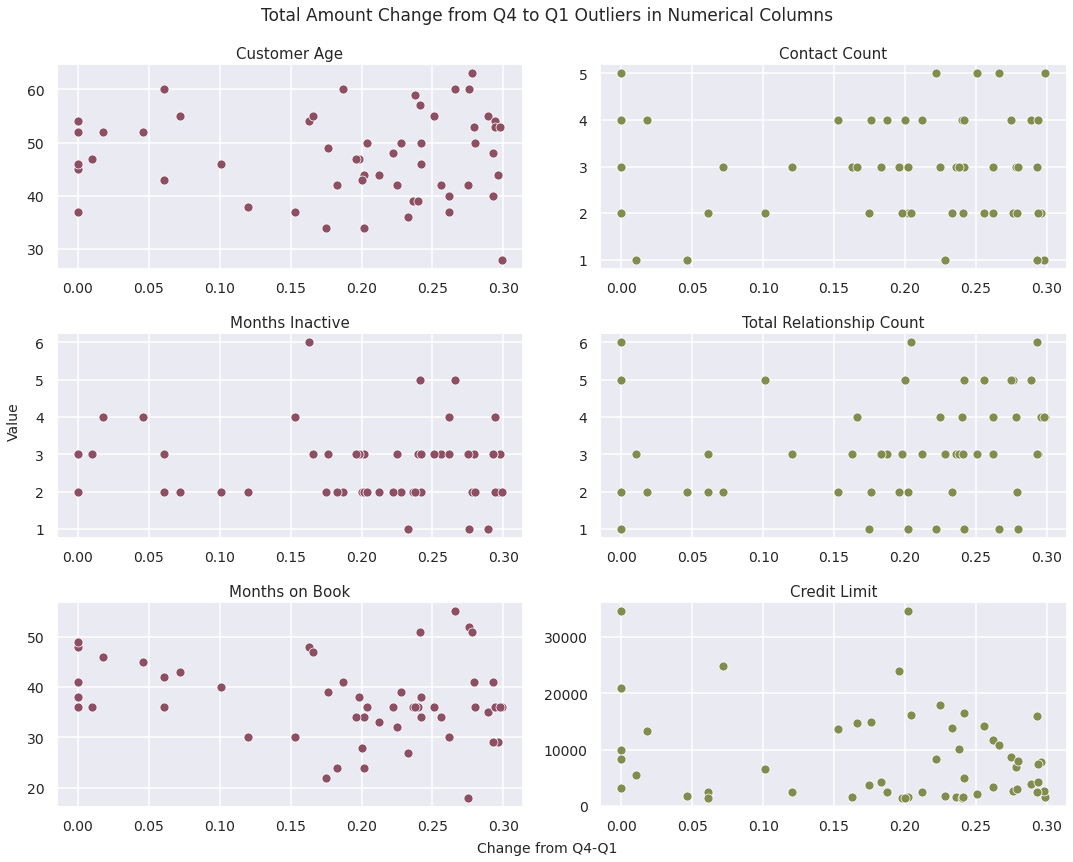

In [38]:
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.6, wspace=0.5)
fig.suptitle("Total Amount Change from Q4 to Q1 Outliers in Numerical Columns", fontsize=17)
fig.text(0.5, 0.0016, 'Change from Q4-Q1', ha='center', fontsize=14)
fig.text(0.00001, 0.5, 'Value', va='center', rotation='vertical', fontsize=14)
sns.set_context('talk')

ax1=sns.scatterplot(data=data[data.total_amt_chng_q4_q1 <= 0.3], x = 'total_amt_chng_q4_q1', y='customer_age',color= '#8C4F63',ax=axes[0,0])
ax1.tick_params(labelsize=14)
ax1.set(xlabel=None)
ax1.set(ylabel=None)
ax2=sns.scatterplot(data=data[data.total_amt_chng_q4_q1 <= 0.3], x = 'total_amt_chng_q4_q1', y='contacts_count_12_mon', color='#828C4F', ax=axes[0,1])
ax2.tick_params(labelsize=14)
ax2.set(xlabel=None)
ax2.set(ylabel=None)
ax3=sns.scatterplot(data=data[data.total_amt_chng_q4_q1 <= 0.3], x = 'total_amt_chng_q4_q1', y='months_inactive_12_mon',color='#8C4F63',ax=axes[1,0])
ax3.tick_params(labelsize=14)
ax3.set(xlabel=None)
ax3.set(ylabel=None)
ax4=sns.scatterplot(data=data[data.total_amt_chng_q4_q1 <= 0.3], x = 'total_amt_chng_q4_q1', y='total_relationship_count', color='#828C4F', ax=axes[1,1])
ax4.tick_params(labelsize=14)
ax4.set(xlabel=None)
ax4.set(ylabel=None)
ax5=sns.scatterplot(data=data[data.total_amt_chng_q4_q1 <= 0.3], x = 'total_amt_chng_q4_q1', y='months_on_book',color='#8C4F63',ax=axes[2,0])
ax5.tick_params(labelsize=14)
ax5.set(xlabel=None)
ax5.set(ylabel=None)
ax6=sns.scatterplot(data=data[data.total_amt_chng_q4_q1 <= 0.3], x = 'total_amt_chng_q4_q1', y='credit_limit',color='#828C4F', ax=axes[2,1])
ax6.tick_params(labelsize=14)
ax6.set(xlabel=None)
ax6.set(ylabel=None)

fontsize=15
ax1.set_title("Customer Age",fontdict={'fontsize': fontsize})
ax2.set_title("Contact Count",fontdict={'fontsize': fontsize})
ax3.set_title("Months Inactive",fontdict={'fontsize': fontsize})
ax4.set_title("Total Relationship Count",fontdict={'fontsize': fontsize})
ax5.set_title("Months on Book",fontdict={'fontsize': fontsize})
ax6.set_title("Credit Limit",fontdict={'fontsize': fontsize})

fig.tight_layout()
fig.show()

There's no linear relationship between the low transaction change amount and numerical data

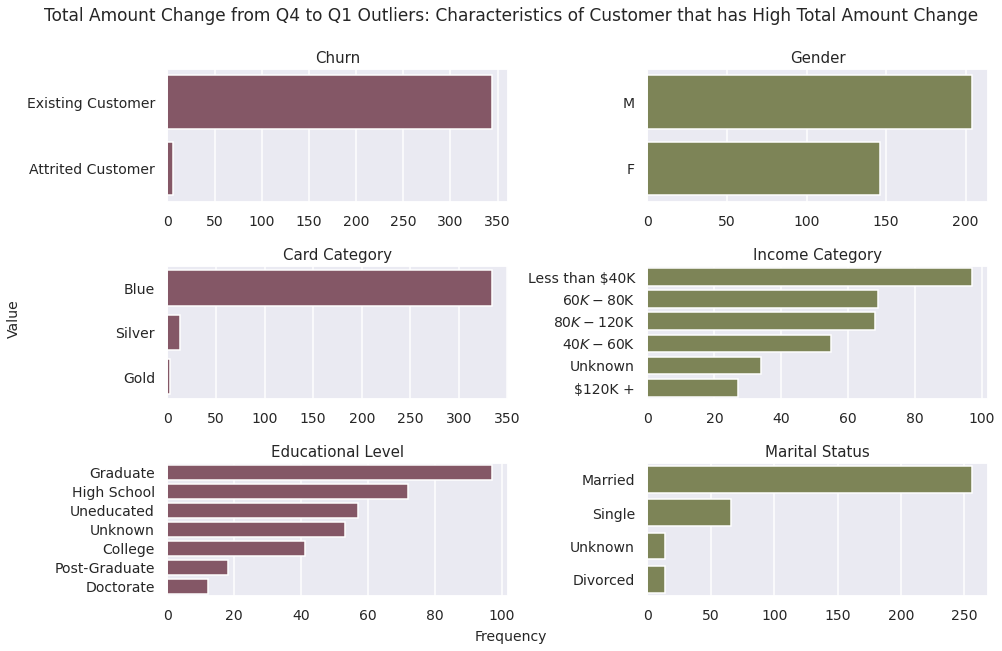

In [39]:
fig, axes = plt.subplots(3, 2, figsize=(14, 9))
plt.subplots_adjust(hspace=0.6, wspace=0.5)
fig.suptitle("Total Amount Change from Q4 to Q1 Outliers: Characteristics of Customer that has High Total Amount Change", fontsize=17)
fig.text(0.5, 0.0016, 'Frequency', ha='center', fontsize=14)
fig.text(0.00001, 0.5, 'Value', va='center', rotation='vertical', fontsize=14)
sns.set_context('talk')

ax1=sns.countplot(y=data[data.total_amt_chng_q4_q1 >= 1.2]['attrition_flag'], color= '#8C4F63', order= data[data.total_amt_chng_q4_q1 >= 1.2]['attrition_flag'].value_counts().index, ax=axes[0,0])
ax1.tick_params(labelsize=14)
ax1.set(xlabel=None)
ax1.set(ylabel=None)
ax2=sns.countplot(y=data[data.total_amt_chng_q4_q1 >= 1.2]['gender'], color='#828C4F', order= data[data.total_amt_chng_q4_q1 >= 1.2]['gender'].value_counts().index, ax=axes[0,1])
ax2.tick_params(labelsize=14)
ax2.set(xlabel=None)
ax2.set(ylabel=None)
ax3=sns.countplot(y=data[data.total_amt_chng_q4_q1 >= 1.2]['card_category'], color='#8C4F63', order= data[data.total_amt_chng_q4_q1 >= 1.2]['card_category'].value_counts().index, ax=axes[1,0])
ax3.tick_params(labelsize=14)
ax3.set(xlabel=None)
ax3.set(ylabel=None)
ax4=sns.countplot(y=data[data.total_amt_chng_q4_q1 >= 1.2]['income_category'], color='#828C4F', order= data[data.total_amt_chng_q4_q1 >= 1.2]['income_category'].value_counts().index, ax=axes[1,1])
ax4.tick_params(labelsize=14)
ax4.set(xlabel=None)
ax4.set(ylabel=None)
ax5=sns.countplot(y=data[data.total_amt_chng_q4_q1 >= 1.2]['education_level'], color='#8C4F63', order= data[data.total_amt_chng_q4_q1 >= 1.2]['education_level'].value_counts().index, ax=axes[2,0])
ax5.tick_params(labelsize=14)
ax5.set(xlabel=None)
ax5.set(ylabel=None)
ax6=sns.countplot(y=data[data.total_amt_chng_q4_q1 >= 1.2]['marital_status'], color='#828C4F', order= data[data.total_amt_chng_q4_q1 >= 1.2]['marital_status'].value_counts().index, ax=axes[2,1])
ax6.tick_params(labelsize=14)
ax6.set(xlabel=None)
ax6.set(ylabel=None)

fontsize=15
ax1.set_title("Churn",fontdict={'fontsize': fontsize})
ax2.set_title("Gender",fontdict={'fontsize': fontsize})
ax3.set_title("Card Category",fontdict={'fontsize': fontsize})
ax4.set_title("Income Category",fontdict={'fontsize': fontsize})
ax5.set_title("Educational Level",fontdict={'fontsize': fontsize})
ax6.set_title("Marital Status",fontdict={'fontsize': fontsize})

fig.tight_layout()
fig.show()

Most customers with high total amount change are existing customers. 

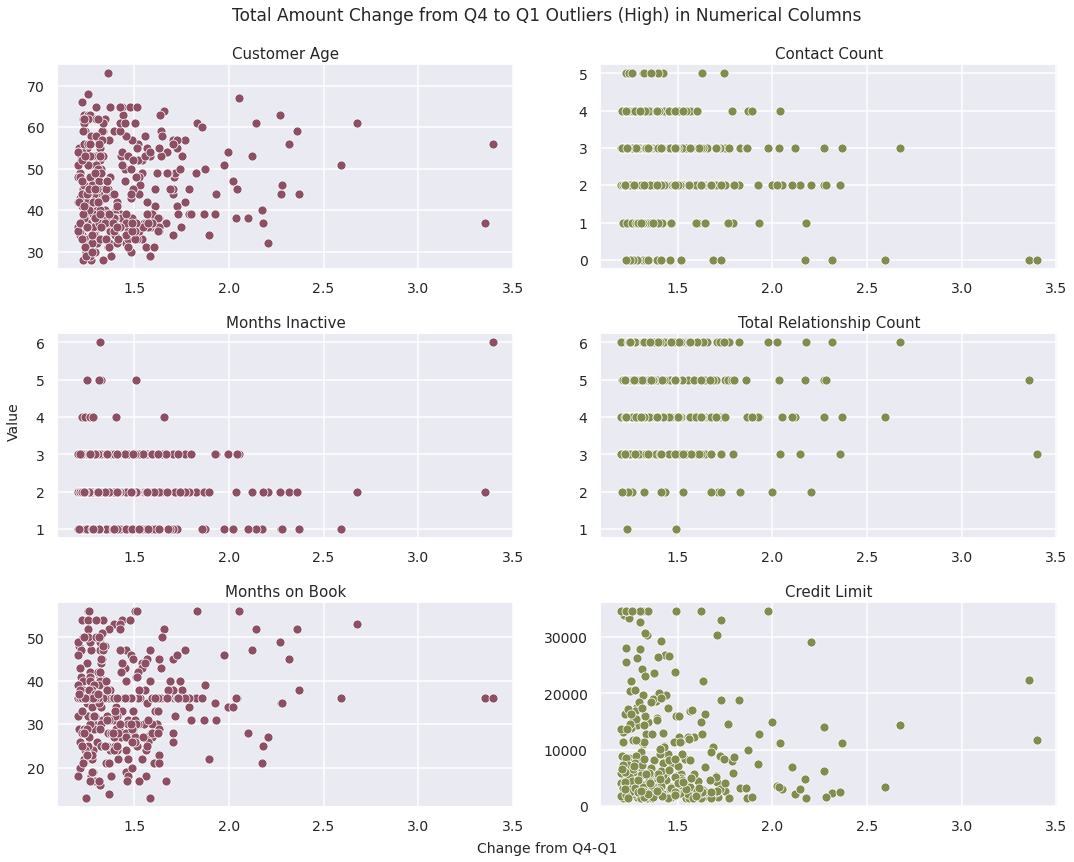

In [40]:
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.6, wspace=0.5)
fig.suptitle("Total Amount Change from Q4 to Q1 Outliers (High) in Numerical Columns", fontsize=17)
fig.text(0.5, 0.0016, 'Change from Q4-Q1', ha='center', fontsize=14)
fig.text(0.00001, 0.5, 'Value', va='center', rotation='vertical', fontsize=14)
sns.set_context('talk')

ax1=sns.scatterplot(data=data[data.total_amt_chng_q4_q1 >= 1.2], x = 'total_amt_chng_q4_q1', y='customer_age',color= '#8C4F63',ax=axes[0,0])
ax1.tick_params(labelsize=14)
ax1.set(xlabel=None)
ax1.set(ylabel=None)
ax2=sns.scatterplot(data=data[data.total_amt_chng_q4_q1 >= 1.2], x = 'total_amt_chng_q4_q1', y='contacts_count_12_mon', color='#828C4F', ax=axes[0,1])
ax2.tick_params(labelsize=14)
ax2.set(xlabel=None)
ax2.set(ylabel=None)
ax3=sns.scatterplot(data=data[data.total_amt_chng_q4_q1 >= 1.2], x = 'total_amt_chng_q4_q1', y='months_inactive_12_mon',color='#8C4F63',ax=axes[1,0])
ax3.tick_params(labelsize=14)
ax3.set(xlabel=None)
ax3.set(ylabel=None)
ax4=sns.scatterplot(data=data[data.total_amt_chng_q4_q1 >= 1.2], x = 'total_amt_chng_q4_q1', y='total_relationship_count', color='#828C4F', ax=axes[1,1])
ax4.tick_params(labelsize=14)
ax4.set(xlabel=None)
ax4.set(ylabel=None)
ax5=sns.scatterplot(data=data[data.total_amt_chng_q4_q1 >= 1.2], x = 'total_amt_chng_q4_q1', y='months_on_book',color='#8C4F63',ax=axes[2,0])
ax5.tick_params(labelsize=14)
ax5.set(xlabel=None)
ax5.set(ylabel=None)
ax6=sns.scatterplot(data=data[data.total_amt_chng_q4_q1 >= 1.2], x = 'total_amt_chng_q4_q1', y='credit_limit',color='#828C4F', ax=axes[2,1])
ax6.tick_params(labelsize=14)
ax6.set(xlabel=None)
ax6.set(ylabel=None)

fontsize=15
ax1.set_title("Customer Age",fontdict={'fontsize': fontsize})
ax2.set_title("Contact Count",fontdict={'fontsize': fontsize})
ax3.set_title("Months Inactive",fontdict={'fontsize': fontsize})
ax4.set_title("Total Relationship Count",fontdict={'fontsize': fontsize})
ax5.set_title("Months on Book",fontdict={'fontsize': fontsize})
ax6.set_title("Credit Limit",fontdict={'fontsize': fontsize})

fig.tight_layout()
fig.show()

There is an extreme two data point outlier

**Total Transaction Amount**

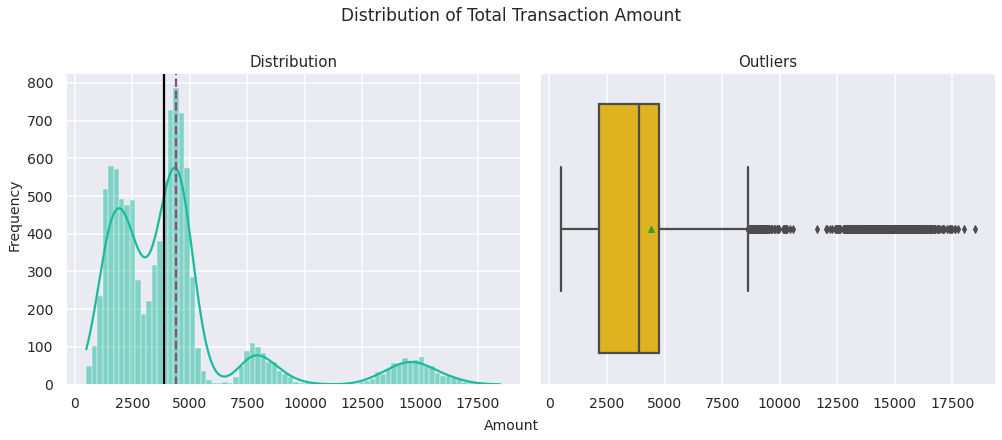

In [41]:
fig, axes = plt.subplots(1,2,figsize=(14, 6))
plt.subplots_adjust(wspace=0.5)
fig.suptitle("Distribution of Total Transaction Amount", fontsize=17)
fig.text(0.5, 0.0016, 'Amount', ha='center', fontsize=14)
fig.text(0.00001, 0.5, 'Frequency', va='center', rotation='vertical', fontsize=14)
sns.set_style("darkgrid",{"axes.facecolour":".9"})
sns.set_context('talk')

ax1=sns.histplot(data, x='total_trans_amt', kde=True, color= '#1abc9c', ax=axes[0])
ax1.axvline(np.mean(data['total_trans_amt']), color='#8C4F78',linestyle='--')
ax1.axvline(np.median(data['total_trans_amt']), color='#000000',linestyle='-')
ax1.tick_params(labelsize=14)
ax1.set(xlabel=None)
ax1.set(ylabel=None)
ax2=sns.boxplot(x=data['total_trans_amt'], color='#FFC300',showmeans=True, ax=axes[1])
ax2.set(xlabel=None)
ax2.set(ylabel=None)
ax2.tick_params(labelsize=14)

fontsize=15
ax1.set_title("Distribution",fontdict={'fontsize': fontsize})
ax2.set_title("Outliers",fontdict={'fontsize': fontsize})

fig.tight_layout()
fig.show()

It has a multimordial distribution which means that we have some underlying groups in our data; 

I hope to perform a cluster analysis to identify the different groups and view the similarities between them and what describes best the different groups which create the different modes in our distribution.

It has a higher outliers. 

**Analysis of Total Transaction Amount Outliers**

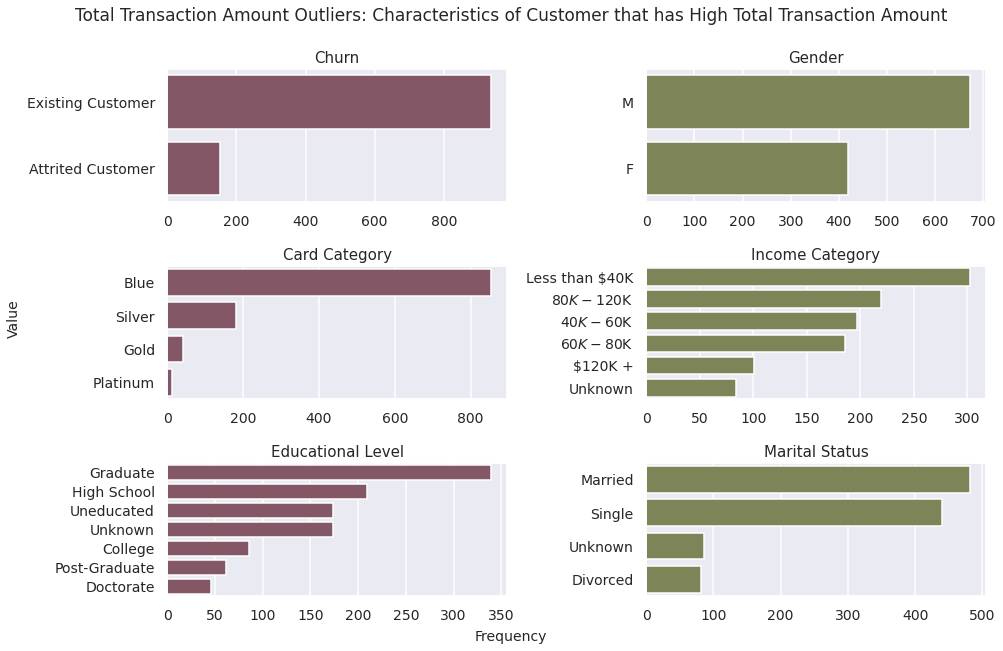

In [42]:
fig, axes = plt.subplots(3, 2, figsize=(14, 9))
plt.subplots_adjust(hspace=0.6, wspace=0.5)
fig.suptitle("Total Transaction Amount Outliers: Characteristics of Customer that has High Total Transaction Amount", fontsize=17)
fig.text(0.5, 0.0016, 'Frequency', ha='center', fontsize=14)
fig.text(0.00001, 0.5, 'Value', va='center', rotation='vertical', fontsize=14)
sns.set_context('talk')

ax1=sns.countplot(y=data[data.total_trans_amt >= 8000]['attrition_flag'], color= '#8C4F63', order=data[data.total_trans_amt >= 8000]['attrition_flag'].value_counts().index, ax=axes[0,0])
ax1.tick_params(labelsize=14)
ax1.set(xlabel=None)
ax1.set(ylabel=None)
ax2=sns.countplot(y=data[data.total_trans_amt >= 8000]['gender'], color='#828C4F', order=data[data.total_trans_amt >= 8000]['gender'].value_counts().index, ax=axes[0,1])
ax2.tick_params(labelsize=14)
ax2.set(xlabel=None)
ax2.set(ylabel=None)
ax3=sns.countplot(y=data[data.total_trans_amt >= 8000]['card_category'], color='#8C4F63', order=data[data.total_trans_amt >= 8000]['card_category'].value_counts().index, ax=axes[1,0])
ax3.tick_params(labelsize=14)
ax3.set(xlabel=None)
ax3.set(ylabel=None)
ax4=sns.countplot(y=data[data.total_trans_amt >= 8000]['income_category'], color='#828C4F', order=data[data.total_trans_amt >= 8000]['income_category'].value_counts().index, ax=axes[1,1])
ax4.tick_params(labelsize=14)
ax4.set(xlabel=None)
ax4.set(ylabel=None)
ax5=sns.countplot(y=data[data.total_trans_amt >= 8000]['education_level'], color='#8C4F63', order=data[data.total_trans_amt >= 8000]['education_level'].value_counts().index, ax=axes[2,0])
ax5.tick_params(labelsize=14)
ax5.set(xlabel=None)
ax5.set(ylabel=None)
ax6=sns.countplot(y=data[data.total_trans_amt >= 8000]['marital_status'], color='#828C4F', order=data[data.total_trans_amt >= 8000]['marital_status'].value_counts().index, ax=axes[2,1])
ax6.tick_params(labelsize=14)
ax6.set(xlabel=None)
ax6.set(ylabel=None)

fontsize=15
ax1.set_title("Churn",fontdict={'fontsize': fontsize})
ax2.set_title("Gender",fontdict={'fontsize': fontsize})
ax3.set_title("Card Category",fontdict={'fontsize': fontsize})
ax4.set_title("Income Category",fontdict={'fontsize': fontsize})
ax5.set_title("Educational Level",fontdict={'fontsize': fontsize})
ax6.set_title("Marital Status",fontdict={'fontsize': fontsize})

fig.tight_layout()
fig.show()

Again, most customers with high amounts do not churn with variety of card category and are mostly male.

Although these are customers with high total transaction amount, the majority income category is <40k.

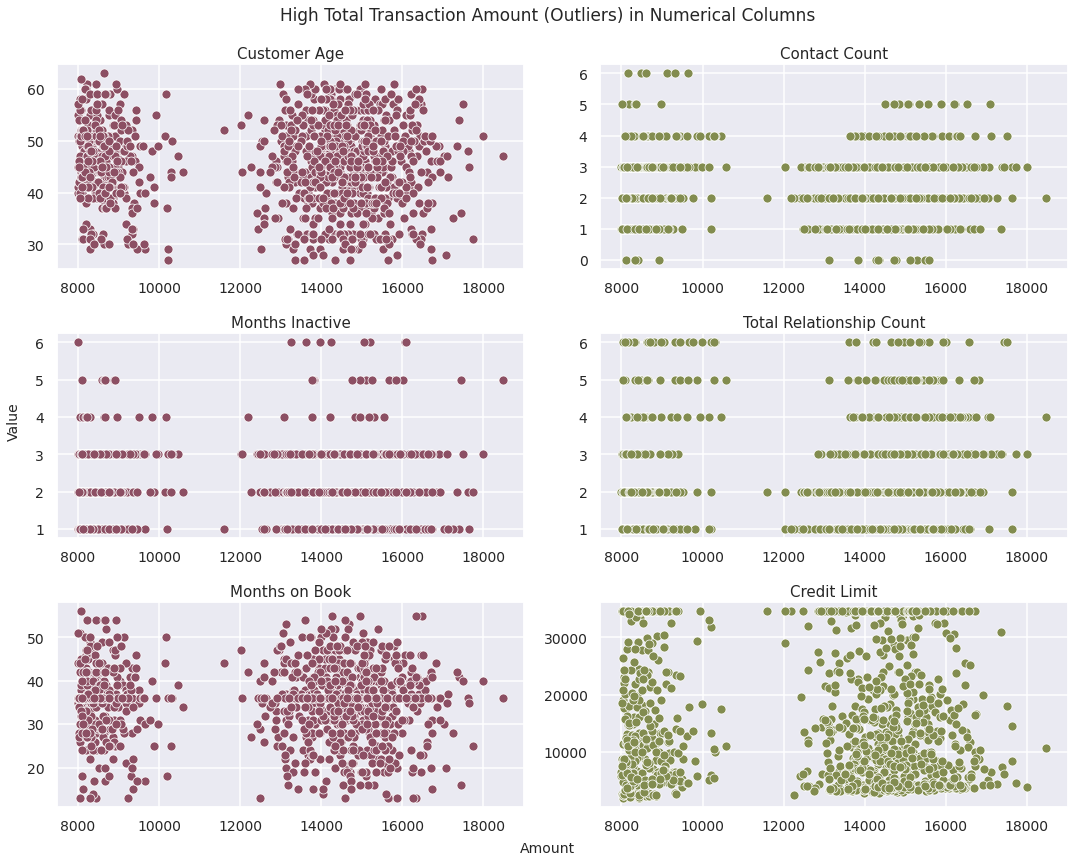

In [43]:
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.6, wspace=0.5)
fig.suptitle("High Total Transaction Amount (Outliers) in Numerical Columns", fontsize=17)
fig.text(0.5, 0.0016, 'Amount', ha='center', fontsize=14)
fig.text(0.00001, 0.5, 'Value', va='center', rotation='vertical', fontsize=14)
sns.set_context('talk')

ax1=sns.scatterplot(data=data[data.total_trans_amt >= 8000], x = 'total_trans_amt', y='customer_age',color= '#8C4F63',ax=axes[0,0])
ax1.tick_params(labelsize=14)
ax1.set(xlabel=None)
ax1.set(ylabel=None)
ax2=sns.scatterplot(data=data[data.total_trans_amt >= 8000], x = 'total_trans_amt', y='contacts_count_12_mon', color='#828C4F', ax=axes[0,1])
ax2.tick_params(labelsize=14)
ax2.set(xlabel=None)
ax2.set(ylabel=None)
ax3=sns.scatterplot(data=data[data.total_trans_amt >= 8000], x = 'total_trans_amt', y='months_inactive_12_mon',color='#8C4F63',ax=axes[1,0])
ax3.tick_params(labelsize=14)
ax3.set(xlabel=None)
ax3.set(ylabel=None)
ax4=sns.scatterplot(data=data[data.total_trans_amt >= 8000], x = 'total_trans_amt', y='total_relationship_count', color='#828C4F', ax=axes[1,1])
ax4.tick_params(labelsize=14)
ax4.set(xlabel=None)
ax4.set(ylabel=None)
ax5=sns.scatterplot(data=data[data.total_trans_amt >= 8000], x = 'total_trans_amt', y='months_on_book',color='#8C4F63',ax=axes[2,0])
ax5.tick_params(labelsize=14)
ax5.set(xlabel=None)
ax5.set(ylabel=None)
ax6=sns.scatterplot(data=data[data.total_trans_amt >= 8000], x = 'total_trans_amt', y='credit_limit',color='#828C4F', ax=axes[2,1])
ax6.tick_params(labelsize=14)
ax6.set(xlabel=None)
ax6.set(ylabel=None)

fontsize=15
ax1.set_title("Customer Age",fontdict={'fontsize': fontsize})
ax2.set_title("Contact Count",fontdict={'fontsize': fontsize})
ax3.set_title("Months Inactive",fontdict={'fontsize': fontsize})
ax4.set_title("Total Relationship Count",fontdict={'fontsize': fontsize})
ax5.set_title("Months on Book",fontdict={'fontsize': fontsize})
ax6.set_title("Credit Limit",fontdict={'fontsize': fontsize})

fig.tight_layout()
fig.show()

There's a cluster of different customer segement in all the numerical column comparisons.

**Total Transaction Count**

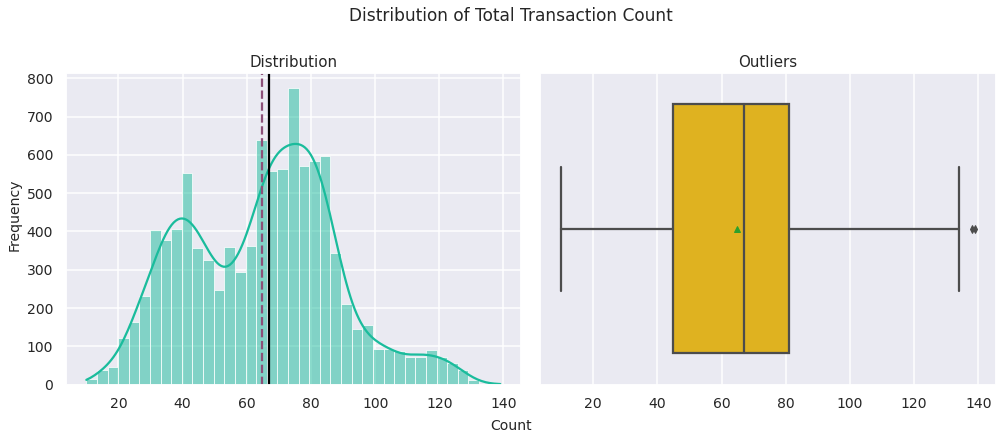

In [44]:
fig, axes = plt.subplots(1,2,figsize=(14, 6))
plt.subplots_adjust(wspace=0.5)
fig.suptitle("Distribution of Total Transaction Count", fontsize=17)
fig.text(0.5, 0.0016, 'Count', ha='center', fontsize=14)
fig.text(0.00001, 0.5, 'Frequency', va='center', rotation='vertical', fontsize=14)
sns.set_style("darkgrid",{"axes.facecolour":".9"})
sns.set_context('talk')

ax1=sns.histplot(data, x='total_trans_ct', kde=True, color= '#1abc9c', ax=axes[0])
ax1.axvline(np.mean(data['total_trans_ct']), color='#8C4F78',linestyle='--')
ax1.axvline(np.median(data['total_trans_ct']), color='#000000',linestyle='-')
ax1.tick_params(labelsize=14)
ax1.set(xlabel=None)
ax1.set(ylabel=None)
ax2=sns.boxplot(x=data['total_trans_ct'], color='#FFC300',showmeans=True, ax=axes[1])
ax2.set(xlabel=None)
ax2.set(ylabel=None)
ax2.tick_params(labelsize=14)

fontsize=15
ax1.set_title("Distribution",fontdict={'fontsize': fontsize})
ax2.set_title("Outliers",fontdict={'fontsize': fontsize})

fig.tight_layout()
fig.show()

Total Transaction Count shows that there are customer segments just like total transaction amount.

It has few higher outliers.

**Change in Total Transaction Count**

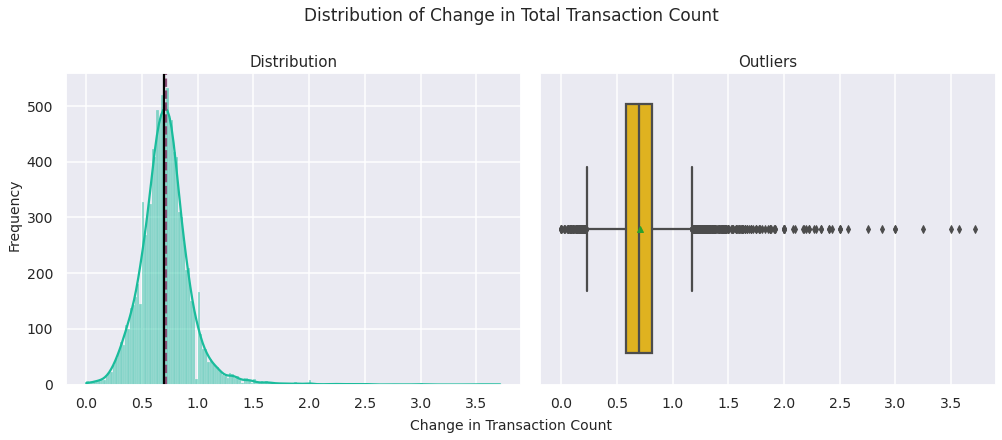

In [45]:
fig, axes = plt.subplots(1,2,figsize=(14, 6))
plt.subplots_adjust(wspace=0.5)
fig.suptitle("Distribution of Change in Total Transaction Count", fontsize=17)
fig.text(0.5, 0.0016, 'Change in Transaction Count', ha='center', fontsize=14)
fig.text(0.00001, 0.5, 'Frequency', va='center', rotation='vertical', fontsize=14)
sns.set_style("darkgrid",{"axes.facecolour":".9"})
sns.set_context('talk')

ax1=sns.histplot(data, x='total_ct_chng_q4_q1', kde=True, color= '#1abc9c', ax=axes[0])
ax1.axvline(np.mean(data['total_ct_chng_q4_q1']), color='#8C4F78',linestyle='--')
ax1.axvline(np.median(data['total_ct_chng_q4_q1']), color='#000000',linestyle='-')
ax1.tick_params(labelsize=14)
ax1.set(xlabel=None)
ax1.set(ylabel=None)
ax2=sns.boxplot(x=data['total_ct_chng_q4_q1'], color='#FFC300',showmeans=True, ax=axes[1])
ax2.set(xlabel=None)
ax2.set(ylabel=None)
ax2.tick_params(labelsize=14)

fontsize=15
ax1.set_title("Distribution",fontdict={'fontsize': fontsize})
ax2.set_title("Outliers",fontdict={'fontsize': fontsize})

fig.tight_layout()
fig.show()

It has lower and higher outliers.

**Average Utilization Ratio**

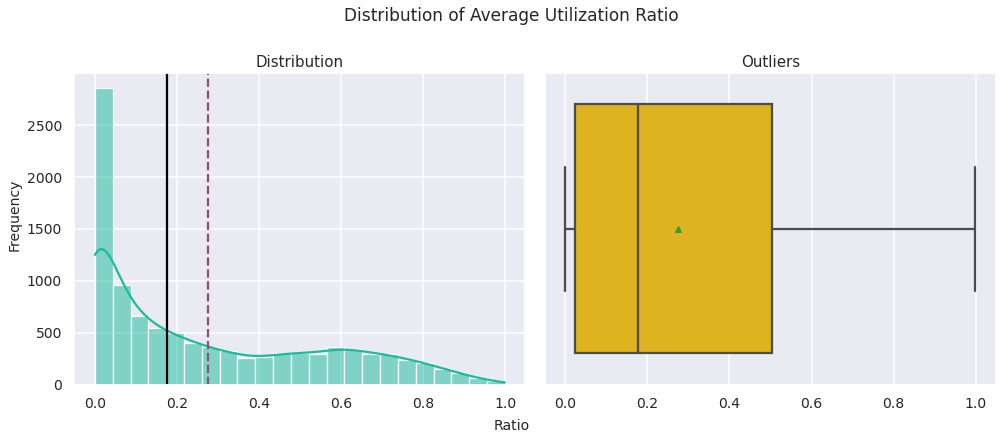

In [46]:
fig, axes = plt.subplots(1,2,figsize=(14, 6))
plt.subplots_adjust(wspace=0.5)
fig.suptitle("Distribution of Average Utilization Ratio", fontsize=17)
fig.text(0.5, 0.0016, 'Ratio', ha='center', fontsize=14)
fig.text(0.00001, 0.5, 'Frequency', va='center', rotation='vertical', fontsize=14)
sns.set_style("darkgrid",{"axes.facecolour":".9"})
sns.set_context('talk')

ax1=sns.histplot(data, x='avg_utilization_ratio', kde=True, color= '#1abc9c', ax=axes[0])
ax1.axvline(np.mean(data['avg_utilization_ratio']), color='#8C4F78',linestyle='--')
ax1.axvline(np.median(data['avg_utilization_ratio']), color='#000000',linestyle='-')
ax1.tick_params(labelsize=14)
ax1.set(xlabel=None)
ax1.set(ylabel=None)
ax2=sns.boxplot(x=data['avg_utilization_ratio'], color='#FFC300',showmeans=True, ax=axes[1])
ax2.set(xlabel=None)
ax2.set(ylabel=None)
ax2.tick_params(labelsize=14)

fontsize=15
ax1.set_title("Distribution",fontdict={'fontsize': fontsize})
ax2.set_title("Outliers",fontdict={'fontsize': fontsize})

fig.tight_layout()
fig.show()

Most of the customers do not use the credit card.

# **4.2 Categorical Data**

**Churn**

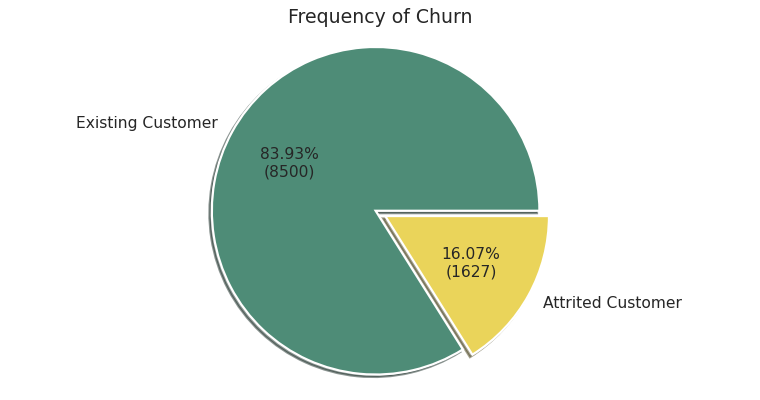

In [47]:
figure(figsize=(12, 6), dpi=80)
sns.set_style("darkgrid",{"axes.facecolour":".9"})
sns.set_context('poster')

total = len(data['attrition_flag'])
def my_fmt(x):
    return '{:.2f}%\n({:.0f})'.format(x, total*x/100)

plt.pie(data['attrition_flag'].value_counts().values, labels=data['attrition_flag'].value_counts().index,
        pctdistance=0.6, shadow=True, labeldistance=1.1, radius=1.5, explode=[0.1,0],colors=['#4E8C77','#EAD45A'], 
        textprops={'fontsize': 14},autopct=my_fmt)
plt.title('Frequency of Churn', fontsize=17)
plt.axis('equal')
plt.show()

This dataset has more existing customers than attrited (churned) customers

**Gender**

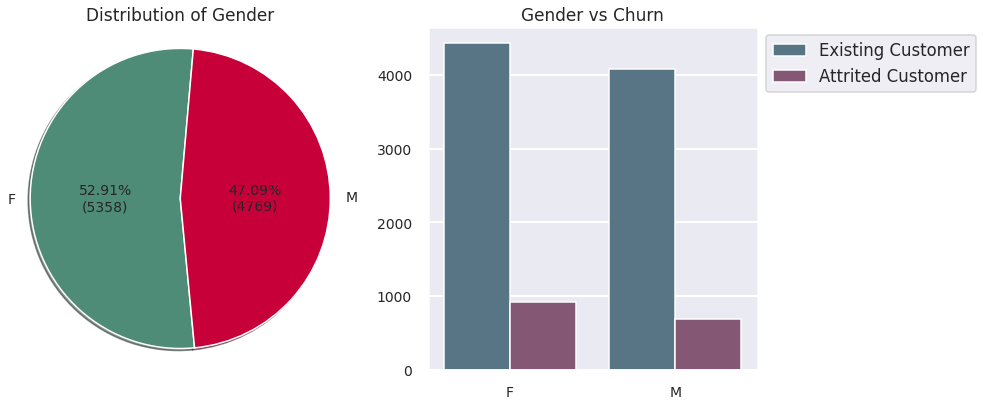

In [48]:
fig, ax = plt.subplots(1,2,figsize=(14, 6))
plt.subplots_adjust(wspace=0.7)
sns.set_style("darkgrid",{"axes.facecolour":".9"})
sns.set_context('talk')

total = len(data['gender'])
def my_fmt(x):
    return '{:.2f}%\n({:.0f})'.format(x, total*x/100)

ax[0].pie(data['gender'].value_counts().values, labels=data['gender'].value_counts().index,explode=[0,0],
        pctdistance=0.5, shadow=True, labeldistance=1.1, radius=1.5, colors=['#4E8C77','#C70039'], startangle=85, textprops={'fontsize': 14},autopct=my_fmt)

ax[1]=sns.countplot(data=data, x='gender', hue='attrition_flag', palette=['#4F788C','#8C4F78'], order=data['gender'].value_counts().index)
plt.setp(ax[1].get_legend().get_title(), fontsize='10') 
plt.setp(ax[1].get_legend().get_texts(), fontsize='10') 
ax[1].legend(bbox_to_anchor= (1,1))
ax[1].set(xlabel=None)
ax[1].set(ylabel=None)
ax[1].tick_params(labelsize=14)

ax[0].set_title('Distribution of Gender', fontsize=17)
ax[0].axis('equal')
ax[1].set_title('Gender vs Churn', fontsize=17)

fig.tight_layout()
fig.show()

This dataset has more female than male. But there is no significant difference between both genders for churning.

**Education Level**

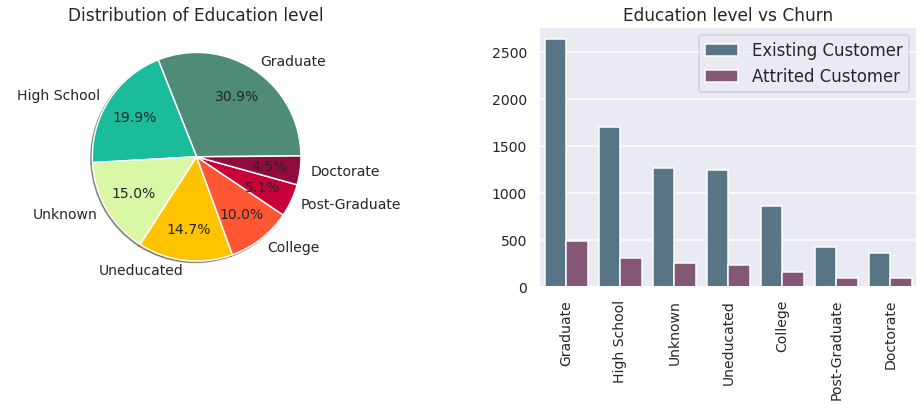

In [49]:
fig, ax = plt.subplots(1,2,figsize=(14, 6))
plt.subplots_adjust(wspace=0.7)
sns.set_style("darkgrid",{"axes.facecolour":".9"})
sns.set_context('talk')


ax[0].pie(data['education_level'].value_counts().values, labels=data['education_level'].value_counts().index, pctdistance=0.70, 
        shadow=True, labeldistance=1.1, radius=1.5, startangle=0.45, colors=['#4E8C77','#1abc9c','#DAF7A6','#FFC300','#FF5733','#C70039','#900C3F'], textprops={'fontsize': 14}, autopct='%.1f%%')

ax[1]=sns.countplot(data=data, x='education_level', hue='attrition_flag', palette=['#4F788C','#8C4F78'], order=data['education_level'].value_counts().index)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
plt.setp(ax[1].get_legend().get_title(), fontsize='10') 
plt.setp(ax[1].get_legend().get_texts(), fontsize='10') 
ax[1].legend(bbox_to_anchor= (1,1))
ax[1].set(xlabel=None)
ax[1].set(ylabel=None)
ax[1].tick_params(labelsize=14)

ax[0].set_title('Distribution of Education level', fontsize=17)
ax[0].axis('equal')
ax[1].set_title('Education level vs Churn', fontsize=17)

fig.tight_layout()
fig.show()

The distribution of educational level is also skewed to the right. 

15% of customer's education are unknown. Over 50% of customers have formal education and about 30% have higher education qualification.

There is no pattern between existing and attrited customer and education level. It does not seem affect churn.

**Marital Status**

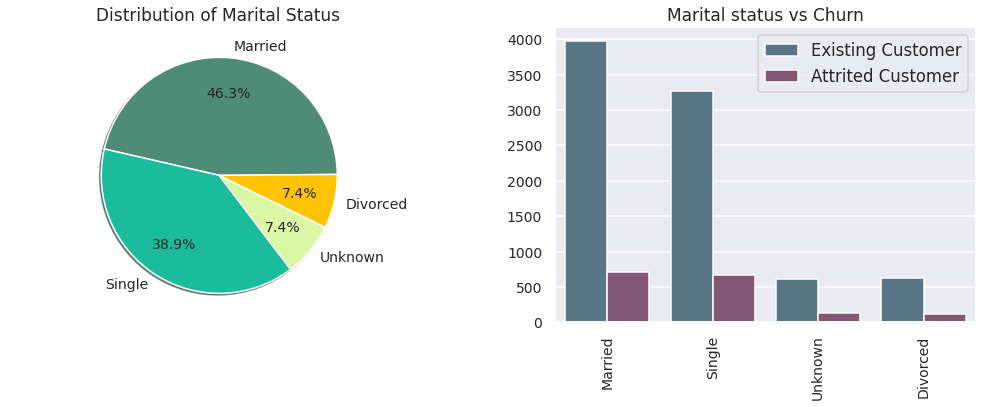

In [50]:
fig, ax = plt.subplots(1,2,figsize=(14, 6))
plt.subplots_adjust(wspace=0.7)
sns.set_style("darkgrid",{"axes.facecolour":".9"})
sns.set_context('talk')


ax[0].pie(data['marital_status'].value_counts().values, labels=data['marital_status'].value_counts().index, pctdistance=0.70, 
        shadow=True, labeldistance=1.1, radius=1.5, startangle=0.45, colors=['#4E8C77','#1abc9c','#DAF7A6','#FFC300'], textprops={'fontsize': 14}, autopct='%.1f%%')

ax[1]=sns.countplot(data=data, x='marital_status', hue='attrition_flag', palette=['#4F788C','#8C4F78'], order=data['marital_status'].value_counts().index)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
plt.setp(ax[1].get_legend().get_title(), fontsize='10') 
plt.setp(ax[1].get_legend().get_texts(), fontsize='10') 
ax[1].legend(bbox_to_anchor= (1,1))
ax[1].set(xlabel=None)
ax[1].set(ylabel=None)
ax[1].tick_params(labelsize=14)

ax[0].set_title('Distribution of Marital Status', fontsize=17)
ax[0].axis('equal')
ax[1].set_title('Marital status vs Churn', fontsize=17)

fig.tight_layout()
fig.show()

Nearly all the customers are either married or single.

**Income Category**

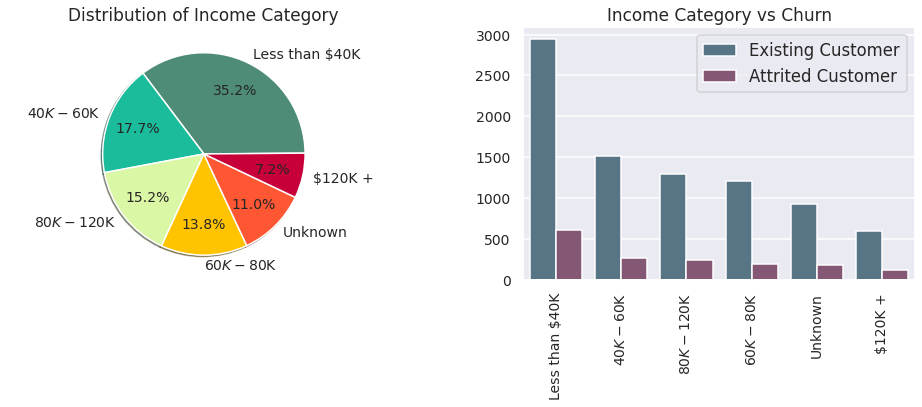

In [51]:
fig, ax = plt.subplots(1,2,figsize=(14, 6))
plt.subplots_adjust(wspace=0.7)
sns.set_style("darkgrid",{"axes.facecolour":".9"})
sns.set_context('talk')


ax[0].pie(data['income_category'].value_counts().values, labels=data['income_category'].value_counts().index, pctdistance=0.70, 
        shadow=True, labeldistance=1.1, radius=1.5, startangle=0.45, colors=['#4E8C77','#1abc9c','#DAF7A6','#FFC300','#FF5733','#C70039'], textprops={'fontsize': 14}, autopct='%.1f%%')

ax[1]=sns.countplot(data=data, x='income_category', hue='attrition_flag', palette=['#4F788C','#8C4F78'], order=data['income_category'].value_counts().index)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
plt.setp(ax[1].get_legend().get_title(), fontsize='10') 
plt.setp(ax[1].get_legend().get_texts(), fontsize='10') 
ax[1].legend(bbox_to_anchor= (1,1))
ax[1].set(xlabel=None)
ax[1].set(ylabel=None)
ax[1].tick_params(labelsize=14)

ax[0].set_title('Distribution of Income Category', fontsize=17)
ax[0].axis('equal')
ax[1].set_title('Income Category vs Churn', fontsize=17)

fig.tight_layout()
fig.show()

It is skewed to the right

**Card Category**

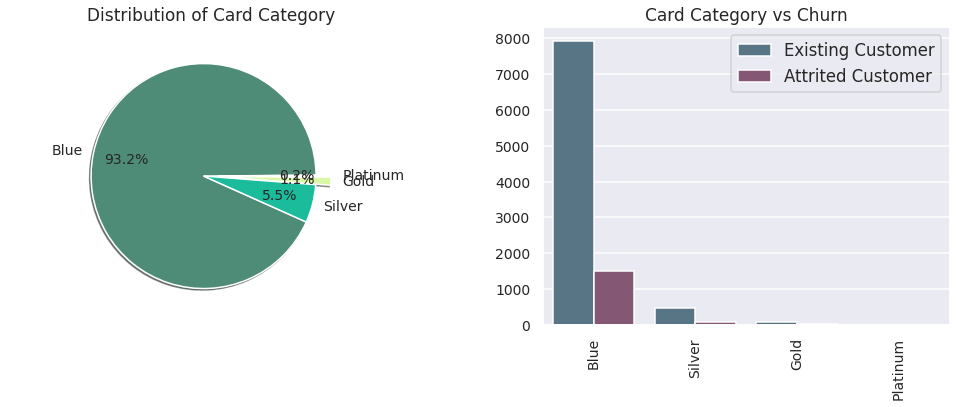

In [52]:
fig, ax = plt.subplots(1,2,figsize=(14, 6))
plt.subplots_adjust(wspace=0.7)
sns.set_style("darkgrid",{"axes.facecolour":".9"})
sns.set_context('talk')


ax[0].pie(data['card_category'].value_counts().values, labels=data['card_category'].value_counts().index, pctdistance=0.70, 
        shadow=True, labeldistance=1.1, radius=1.5, explode=[0,0,0.2,0.2],startangle=0.45, colors=['#4E8C77','#1abc9c','#DAF7A6','#FFC300'], textprops={'fontsize': 14}, autopct='%.1f%%')

ax[1]=sns.countplot(data=data, x='card_category', hue='attrition_flag', palette=['#4F788C','#8C4F78'], order=data['card_category'].value_counts().index)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
plt.setp(ax[1].get_legend().get_title(), fontsize='10') 
plt.setp(ax[1].get_legend().get_texts(), fontsize='10') 
ax[1].legend(bbox_to_anchor= (1,1))
ax[1].set(xlabel=None)
ax[1].set(ylabel=None)
ax[1].tick_params(labelsize=14)

ax[0].set_title('Distribution of Card Category', fontsize=17)
ax[0].axis('equal')
ax[1].set_title('Card Category vs Churn', fontsize=17)

fig.tight_layout()
fig.show()

Over 90% of customers use Blue card

# **Relationship between Numerical Columns**

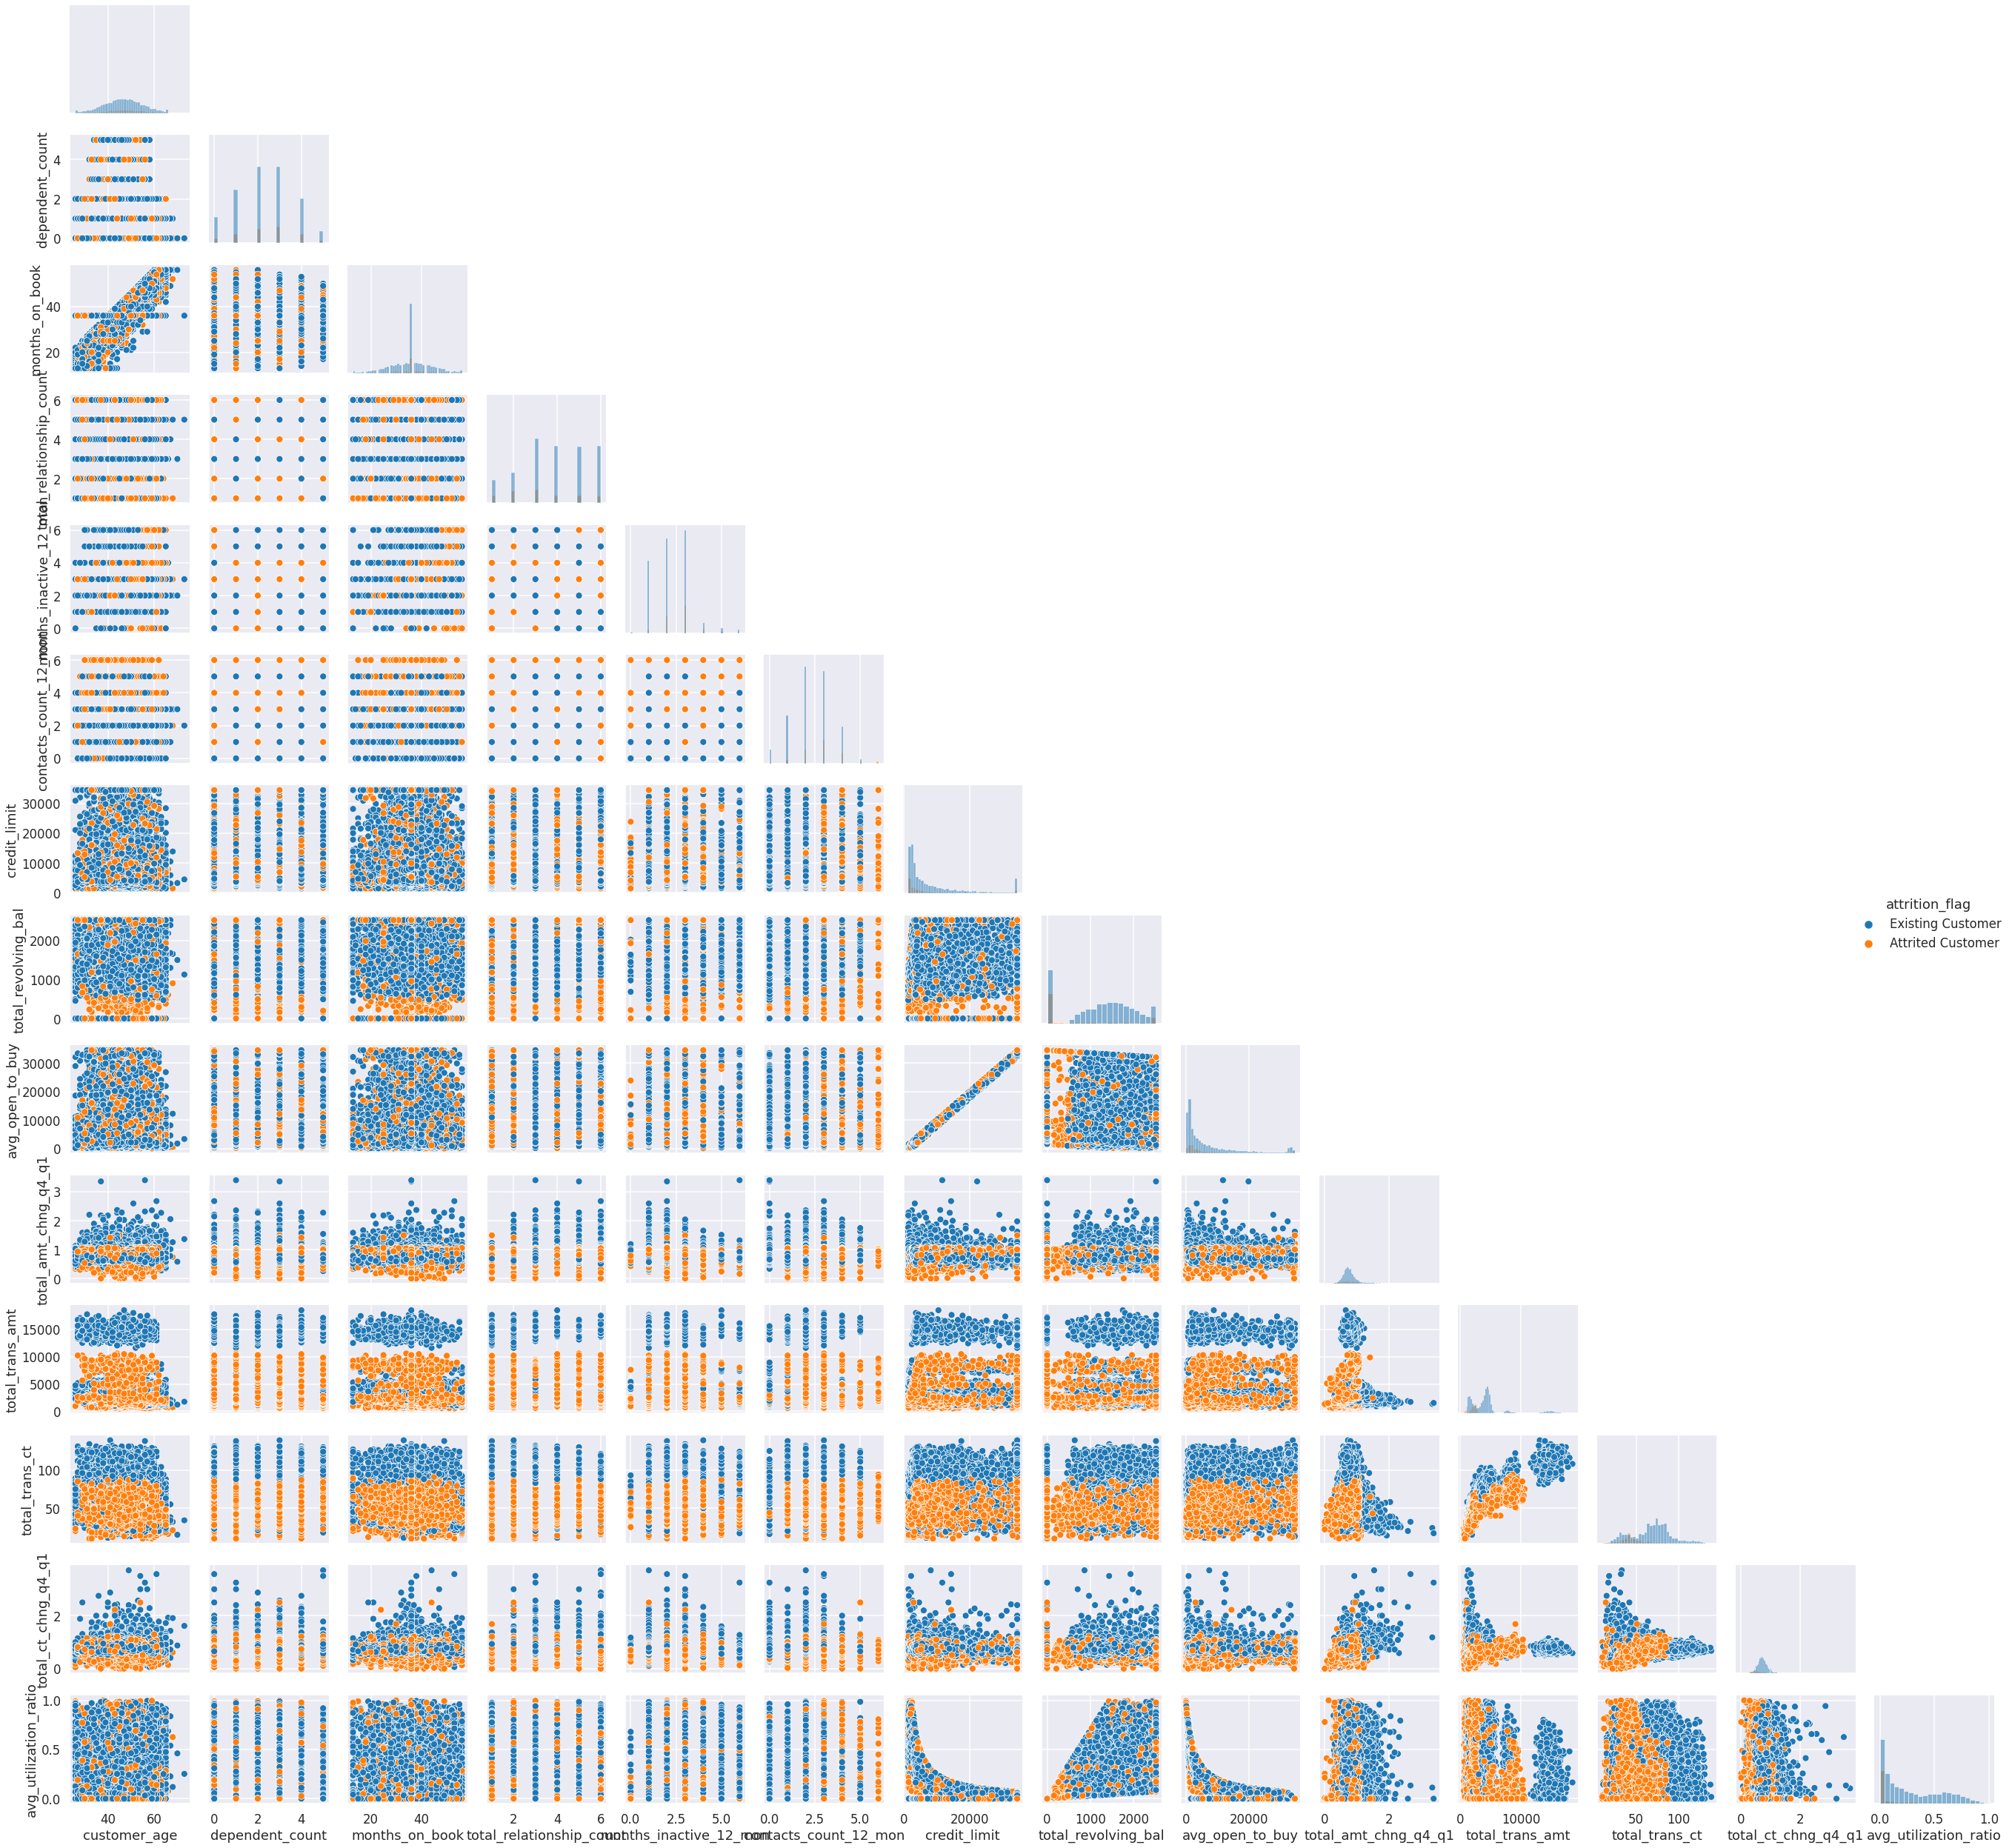

In [53]:
sns.pairplot(data=data, hue='attrition_flag', corner=True, diag_kind="hist")
plt.tight_layout()
plt.show()

Customers with low total count change from Q4 to Q1, low total transaction count, low total transaction amount and total revolving balance of 100-900 churn more

There seems to be a cluster in total_revolving_bal, total_trans_amt, total_trans_ct, total_trans_chng_q4_q1

# **Correlation**

In [54]:
data['attrition_flag'] = np.where(data['attrition_flag']=='Attrited Customer',1,0)

<AxesSubplot:>

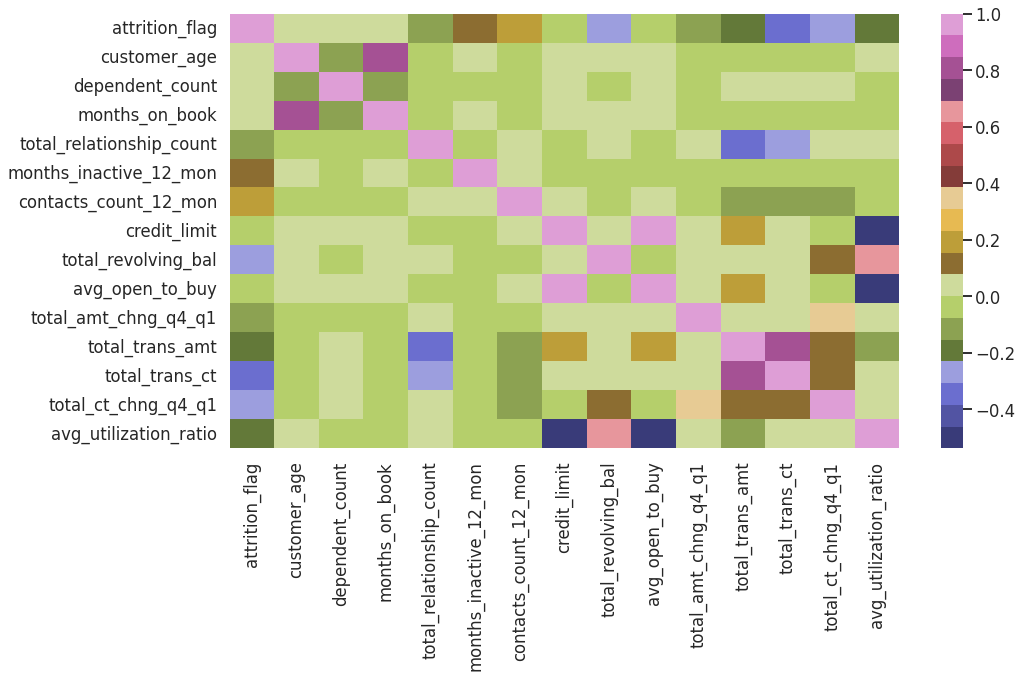

In [55]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), cmap="tab20b")

For attrition_flag, there is really no strong positive or negative correlation. The only fairly negative correlation is seen in total_trans_ct.

Credit limit and average open-to-buy are collinear; however, they are negatively correlated with average utilization ratio.

There's a strong positive correlation between months_on_book and customer age, same relationship can be seen between total transaction amount and transaction count.

There is a negative correlation between total_relationship_count and total transaction amount.

In [56]:
new_data = data.copy()
new_data_num = pd.get_dummies(new_data)

**Correlation between Churn and each value in categorical columns**

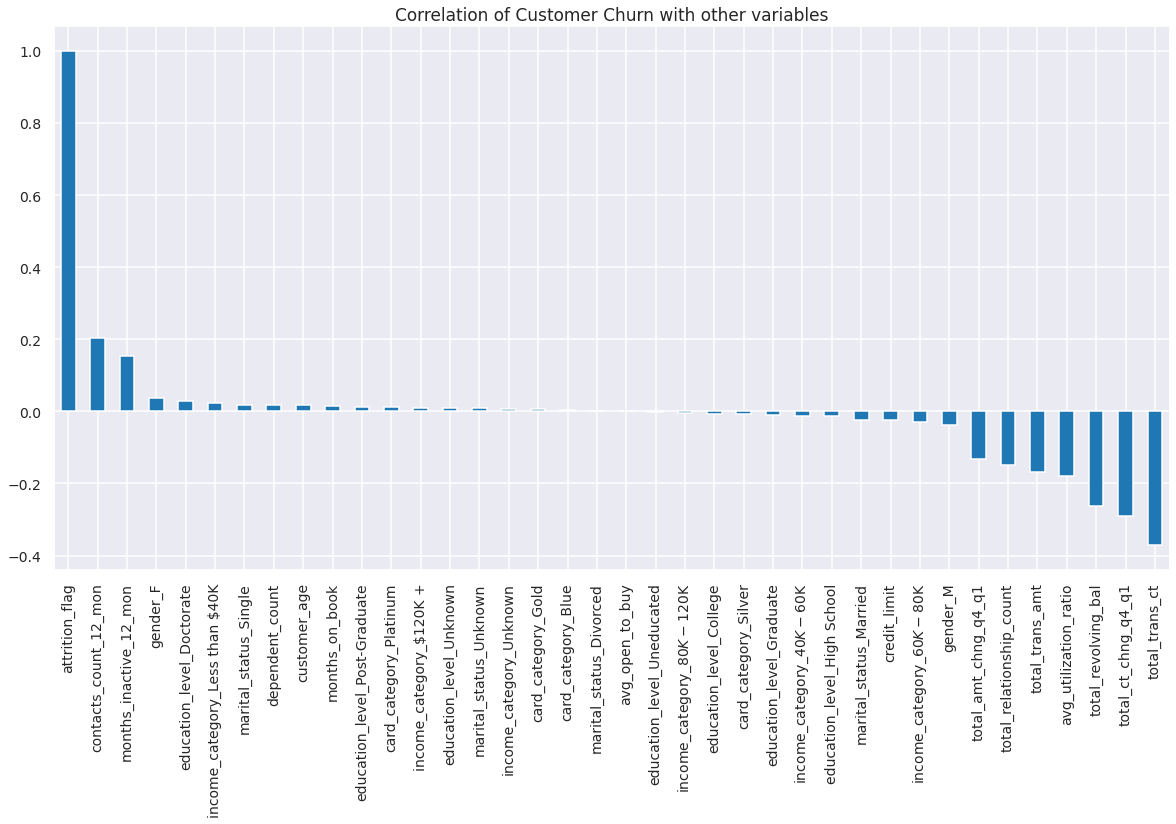

In [57]:
plt.figure(figsize=(20,10))
new_data_num.corr()['attrition_flag'].sort_values(ascending=False).plot(kind='bar')
plt.title('Correlation of Customer Churn with other variables', fontsize=17)
plt.tick_params(labelsize=14)
plt.show()

There is a positive correlation between contacts_count_12_months and month_inactive_12_months, but a negative correlation between total_trans_ct, total_ct_chng_q4_q1 and total revolving balance

**Assumptions based on EDA:**

* There is a relationship between contacts_count_12_months and churn
* There is a relationship between month_inactive_12_months and churn
* There is a relationship between total_trans_ct and churn
* There is a relationship between total_ct_chng_q4_q1 and churn
* There is a relationship between total_revolving_bal and churn
* People with lesser income category churn more
* The variables are not independent: average open-to-buy and credit limit are collinear
* Female customers are in the low income category

**I will use chi-test to confirm some relationships assumptions**

In [58]:
def chi_test(column):
    chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(pd.crosstab(data[column], data['attrition_flag']))
    print(f"chi2 statistic:     {chi2_stat:.6g}")
    print(f"p-value:            {p}")
    print(f"degrees of freedom: {dof}")
    print("expected frequencies:\n",expected)
    if p<=0.05:
        print("Reject Null Hypothesis")
        print(f"There is a significant association between {column} and Churn.")
    else:
        print("Accept Null Hypthesis there is no association")

In [59]:
chi_test('contacts_count_12_mon')

chi2 statistic:     586.638
p-value:            1.7769862229781973e-123
degrees of freedom: 6
expected frequencies:
 [[ 334.89681051   64.10318949]
 [1258.17122544  240.82877456]
 [2708.55139725  518.44860275]
 [2836.97047497  543.02952503]
 [1168.36180508  223.63819492]
 [ 147.72390639   28.27609361]
 [  45.32438037    8.67561963]]
Reject Null Hypothesis
There is a significant association between contacts_count_12_mon and Churn.


In [60]:
chi_test('months_inactive_12_mon')

chi2 statistic:     396.456
p-value:            1.6155198022594863e-82
degrees of freedom: 6
expected frequencies:
 [[  24.34087094    4.65912906]
 [1874.24706231  358.75293769]
 [2754.715118    527.284882  ]
 [3228.10309075  617.89690925]
 [ 365.11306409   69.88693591]
 [ 149.40258714   28.59741286]
 [ 104.07820677   19.92179323]]
Reject Null Hypothesis
There is a significant association between months_inactive_12_mon and Churn.


In [61]:
chi_test('total_trans_amt')

chi2 statistic:     6883.17
p-value:            4.501517465448383e-62
degrees of freedom: 5032
expected frequencies:
 [[0.83934038 0.16065962]
 [0.83934038 0.16065962]
 [0.83934038 0.16065962]
 ...
 [0.83934038 0.16065962]
 [0.83934038 0.16065962]
 [0.83934038 0.16065962]]
Reject Null Hypothesis
There is a significant association between total_trans_amt and Churn.


# **Final Findings from EDA Performed**

**As stated above, the objective of this exploratory data analysis is to inspect and analyse each variable and target to uncover the reason behind customer churn. After much data investigation here is what I found:**

**The dataset consists of 10,127 customers mentioning their age, income category, marital status, credit card limit, card category, etc. There are 20 features. Most of these features have mostly higher end outliers and low ends too. These data also appears to have segments seen as three clusters in total transaction amount. It will nice to examine these segments. Only 16.07% of customers who have churned.**

**Through the total revolving balance of customers, I got to know that most customers are not using their credit cards, while some use very little amount from their credit limit.**

**It is quite an interesting EDA, I discovered that the more customers made contact with bank the more they left. My assumption is that these contacts could be compliants. Also, the higher earning customers churn lesser than their counterparts. These higher income category customers seems to have a higher credit limit and average open-to-buy.**

**I would also like to add that male customers have higher earnings than females.**

**With the help of a heatmap, I noticed that there was no correlation above -0.4 for negative correlation and 0.2 for positive correlation. This makes it had to ascertain a strong relationship, and in some way, cause of churn. That being said, I recommend that the bank manager eliminate customer contact with bank, by maybe quick resolution of their problems. It is also good that the bank manager wants to predict customers who would likely get churned, this way they can proactively go to the customer to provide them better services and change their minds from leaving.**

In [62]:
new_data.to_csv('customer_churn_1.csv',index=False) #new data for data pre-processing.